Beale synthetic function:

GP CBM versus STP nu = 3 CBM (winner)

https://www.sfu.ca/~ssurjano/camel6.html

In [1]:
pip install pyGPGO


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
### Import modules:

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings

from pyGPGO.logger import EventLogger
from pyGPGO.GPGO import GPGO
from pyGPGO.surrogates.GaussianProcess import GaussianProcess
from pyGPGO.surrogates.tStudentProcess import tStudentProcess, logpdf
from pyGPGO.acquisition import Acquisition
from pyGPGO.covfunc import squaredExponential

from collections import OrderedDict
from joblib import Parallel, delayed
from numpy.linalg import slogdet, inv, cholesky, solve
from scipy.optimize import minimize
from scipy.spatial.distance import cdist
from scipy.special import gamma
from scipy.stats import norm, t
from matplotlib.pyplot import rc

rc('text', usetex=False)
plt.rcParams['text.latex.preamble']=[r'\usepackage{amsmath}']
plt.rcParams['text.latex.preamble'] = [r'\boldmath']

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)


In [3]:
### Inputs:

obj_func = 'Beale'
n_test = 500 # test points
df = 3 # nu

util_gp = 'CBMinimized'
util_stp = 'tCBMinimized'
n_init = 5 # random initialisations

cov_func = squaredExponential()
hyperOpt = True


In [4]:
### Objective function:

if obj_func == 'Beale':
    
    # True y bounds:
    y_lb = 0
    operator = -1 # targets global minimum 
    y_global_orig = y_lb * operator # targets global minimum
            
# Constraints:
    lb = -4.5 
    ub = +4.5

# Input array dimension(s):
    dim = 2

# 2-D inputs' parameter bounds:
    param = {'x1_training': ('cont', [lb, ub]),
             'x2_training': ('cont', [lb, ub])}
    
# Test data:
    x1_test = np.linspace(lb, ub, n_test)
    x2_test = np.linspace(lb, ub, n_test)
    Xstar_d = np.column_stack((x1_test, x2_test))

    def f_syn_polarity(x1_training, x2_training):
        return operator * (
                (1.500 - x1_training + x1_training * x2_training)**2 +
                (2.250 - x1_training + x1_training * x2_training**2)**2 +
                (2.625 - x1_training + x1_training * x2_training**3)**2 
                )
    

In [5]:
max_iter = dim * 10  # iterations of Bayesian optimisation
Beta_CBM = dim


In [6]:
### Cumulative Regret Calculator:

def min_max_array(x):
    new_list = []
    for i, num in enumerate(x):
            new_list.append(np.min(x[0:i+1]))
    return new_list


In [7]:
### Set-seeds:

run_num_1 = 1
run_num_2 = 2
run_num_3 = 3
run_num_4 = 4
run_num_5 = 5
run_num_6 = 6
run_num_7 = 7
run_num_8 = 8
run_num_9 = 9
run_num_10 = 10
run_num_11 = 11
run_num_12 = 12
run_num_13 = 13
run_num_14 = 14
run_num_15 = 15
run_num_16 = 16
run_num_17 = 17
run_num_18 = 18
run_num_19 = 19
run_num_20 = 20


In [8]:
### Acquisition function - CBM:

class Acquisition_new(Acquisition):    
    def __init__(self, mode, eps=1e-06, **params):
        
        self.params = params
        self.eps = eps

        mode_dict = {
            'CBMinimized': self.CBMinimized,
            'tCBMinimized': self.tCBMinimized
        }

        self.f = mode_dict[mode]
   
    def CBMinimized(self, tau, mean, std):
        
        gamma = (mean - y_global_orig - self.eps) / (std + self.eps)
        return (std + self.eps) * (gamma + np.sqrt(Beta_CBM))
    
    def tCBMinimized(self, tau, mean, std, nu=3.0):
        
        gamma = (mean - y_global_orig - self.eps) / (std + self.eps)
        return (std + self.eps) * (gamma + np.sqrt(Beta_CBM))
    

In [9]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 1

np.random.seed(run_num_1)
surrogate_gp_1 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_1 = GPGO(surrogate_gp_1, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_1.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-0.74680196  1.98292044]. 	  -6.597029498756062 	 -6.597029498756062
init   	 [-4.49897063 -1.77900685]. 	  -1305.4710589552556 	 -6.597029498756062
init   	 [-3.17919698 -3.66895265]. 	  -28173.776013477825 	 -6.597029498756062
init   	 [-2.8236581  -1.38995346]. 	  -237.9931764117774 	 -6.597029498756062
init   	 [-0.92909273  0.34935061]. 	  -26.1790631757263 	 -6.597029498756062
1      	 [-2.52377987 -0.5019628 ]. 	  -75.01150669297571 	 -6.597029498756062
2      	 [-2.50787525 -0.55068021]. 	  -75.84038115363329 	 -6.597029498756062
3      	 [ 4.5 -4.5]. 	  -178131.83203125 	 -6.597029498756062
4      	 [4.5 4.5]. 	  -174813.36328125 	 -6.597029498756062
5      	 [-4.5  4.5]. 	  -169680.83203125 	 -6.597029498756062
6      	 [ 1.96153974 -0.01632951]. 	  -0.767291592924707 	 -0.767291592924707
7      	 [ 0.85480972 -1.25678519]. 	  -7.726575310880469 	 -0.767291592924707
8      	 [2.7162289  0.03763694]. 	  -1.463

In [10]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 2

np.random.seed(run_num_2)
surrogate_gp_2 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_2 = GPGO(surrogate_gp_2, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_2.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-0.57604588 -4.26666391]. 	  -2377.8441741808733 	 -8.81624267140378
init   	 [ 0.4469623  -0.58209847]. 	  -8.81624267140378 	 -8.81624267140378
init   	 [-0.71668978 -1.52698661]. 	  -47.3742628518178 	 -8.81624267140378
init   	 [-2.65816229  1.0734387 ]. 	  -9.08861590265506 	 -8.81624267140378
init   	 [-1.80310794 -2.09855452]. 	  -510.2220943696988 	 -8.81624267140378
1      	 [ 0.24449294 -0.61206685]. 	  -11.023807044058522 	 -8.81624267140378
2      	 [4.5 4.5]. 	  -174813.36328125 	 -8.81624267140378
3      	 [ 4.5        -2.33066652]. 	  -4137.3385876529 	 -8.81624267140378
4      	 [-4.5  4.5]. 	  -169680.83203125 	 -8.81624267140378
5      	 [-1.99029263  0.75765934]. 	  -27.585676556659134 	 -8.81624267140378
6      	 [-4.5        -0.29169892]. 	  -146.3844697572551 	 -8.81624267140378
7      	 [-4.5 -4.5]. 	  -181853.61328125 	 -8.81624267140378
8      	 [0.06735135 2.23810004]. 	  -19.831683401952567 	

In [11]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 3

np.random.seed(run_num_3)
surrogate_gp_3 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_3 = GPGO(surrogate_gp_3, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_3.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [0.45718112 1.8733304 ]. 	  -41.912714742005974 	 -41.912714742005974
init   	 [-1.88185735  0.09744845]. 	  -47.451188393399434 	 -41.912714742005974
init   	 [3.53652259 3.5666378 ]. 	  -27475.816689924115 	 -41.912714742005974
init   	 [-3.36973221 -2.6348141 ]. 	  -5079.048973002421 	 -41.912714742005974
init   	 [-4.03679517 -0.53271141]. 	  -138.4086524103332 	 -41.912714742005974
1      	 [-4.5         1.09809206]. 	  -4.234225567548442 	 -4.234225567548442
2      	 [ 4.5 -4.5]. 	  -178131.83203125 	 -4.234225567548442
3      	 [-2.9886538  4.5      ]. 	  -74279.85914353076 	 -4.234225567548442
4      	 [-4.5         0.64838498]. 	  -67.89318871939105 	 -4.234225567548442
5      	 [ 0.9498447  -1.21142098]. 	  -7.618917084658082 	 -4.234225567548442
6      	 [-0.06192596 -4.5       ]. 	  -73.89470608196419 	 -4.234225567548442
7      	 [ 2.45971822 -0.43351949]. 	  -4.1699146793554105 	 -4.1699146793554105
8     

In [12]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 4

np.random.seed(run_num_4)
surrogate_gp_4 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_4 = GPGO(surrogate_gp_4, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_4.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [4.20326855 0.42509024]. 	  -3.8409856613776237 	 -3.8409856613776237
init   	 [4.25415924 1.93334394]. 	  -1070.6518137934977 	 -3.8409856613776237
init   	 [ 1.77955942 -2.55519454]. 	  -1001.3529311398922 	 -3.8409856613776237
init   	 [ 4.28647009 -4.4439277 ]. 	  -150069.47442764963 	 -3.8409856613776237
init   	 [-2.22315874 -0.58687621]. 	  -67.08861688517413 	 -3.8409856613776237
1      	 [ 4.10053899 -0.28327087]. 	  -18.929344170507463 	 -3.8409856613776237
2      	 [-4.5  4.5]. 	  -169680.83203125 	 -3.8409856613776237
3      	 [-4.5 -4.5]. 	  -181853.61328125 	 -3.8409856613776237
4      	 [0.88261056 4.5       ]. 	  -7143.2019024671245 	 -3.8409856613776237
5      	 [0.31779757 0.44253221]. 	  -11.178713063792111 	 -3.8409856613776237
6      	 [ 4.5        -0.28020637]. 	  -25.649593541539797 	 -3.8409856613776237
7      	 [1.09159004 0.46370567]. 	  -5.474254334631455 	 -3.8409856613776237
8      	 [1.1055

In [13]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 5

np.random.seed(run_num_5)
surrogate_gp_5 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_5 = GPGO(surrogate_gp_5, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_5.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-2.50206146  3.33659076]. 	  -8263.905568073349 	 -0.311397019260738
init   	 [-2.6395276   3.76749817]. 	  -19560.15202528338 	 -0.311397019260738
init   	 [-0.1042993   1.00569477]. 	  -14.186578993925806 	 -0.311397019260738
init   	 [2.39317071 0.16576189]. 	  -0.311397019260738 	 -0.311397019260738
init   	 [-1.82879549 -2.81050894]. 	  -2208.9823086257425 	 -0.311397019260738
1      	 [ 4.5 -4.5]. 	  -178131.83203125 	 -0.311397019260738
2      	 [4.5 4.5]. 	  -174813.36328125 	 -0.311397019260738
3      	 [-4.5        -0.03093366]. 	  -133.96170535871184 	 -0.311397019260738
4      	 [ 4.50000000e+00 -7.71630299e-04]. 	  -17.59895902583974 	 -0.311397019260738
5      	 [-4.0962526   4.20346402]. 	  -93009.39892863948 	 -0.311397019260738
6      	 [-1.21084004  1.57650331]. 	  -1.6722231393861362 	 -0.311397019260738
7      	 [-1.18471509  1.59034266]. 	  -1.746181275835089 	 -0.311397019260738
8      	 [-1.17826

In [14]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 6

np.random.seed(run_num_6)
surrogate_gp_6 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_6 = GPGO(surrogate_gp_6, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_6.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 3.53574136 -1.51218175]. 	  -273.3122030790333 	 -10.038000709758428
init   	 [ 2.89106211 -4.12473037]. 	  -43803.250406689425 	 -10.038000709758428
init   	 [-3.53108988  0.85546858]. 	  -29.828433746298536 	 -10.038000709758428
init   	 [ 0.26835626 -0.73073314]. 	  -10.658925295067505 	 -10.038000709758428
init   	 [-1.48132936  1.10267489]. 	  -10.038000709758428 	 -10.038000709758428
1      	 [4.5        1.30921198]. 	  -105.82707145448805 	 -10.038000709758428
2      	 [-4.5 -4.5]. 	  -181853.61328125 	 -10.038000709758428
3      	 [1.00578114 4.5       ]. 	  -9191.73463791626 	 -10.038000709758428
4      	 [-4.5  4.5]. 	  -169680.83203125 	 -10.038000709758428
5      	 [1.78669151 0.39473091]. 	  -1.6243944224401659 	 -1.6243944224401659
6      	 [-1.66523133 -0.9173489 ]. 	  -59.431277743879306 	 -1.6243944224401659
7      	 [1.70332025 0.36133423]. 	  -1.7654109820092654 	 -1.6243944224401659
8      	 [1.733

In [15]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 7

np.random.seed(run_num_7)
surrogate_gp_7 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_7 = GPGO(surrogate_gp_7, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_7.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-3.8132254   2.51926913]. 	  -3321.1422834954587 	 -2.9676923934097053
init   	 [-0.55431692  2.0111866 ]. 	  -2.9676923934097053 	 -2.9676923934097053
init   	 [4.30190561 0.34646283]. 	  -6.32173172477085 	 -2.9676923934097053
init   	 [ 0.01008417 -3.8515398 ]. 	  -11.971894461559128 	 -2.9676923934097053
init   	 [-2.08404918e+00 -1.05749257e-03]. 	  -53.820317186435204 	 -2.9676923934097053
1      	 [0.37889363 2.10025015]. 	  -49.35812268373875 	 -2.9676923934097053
2      	 [-4.5 -4.5]. 	  -181853.61328125 	 -2.9676923934097053
3      	 [2.90384765 4.5       ]. 	  -73389.95660308214 	 -2.9676923934097053
4      	 [0.11827266 1.02879756]. 	  -14.299811442243726 	 -2.9676923934097053
5      	 [ 4.5 -4.5]. 	  -178131.83203125 	 -2.9676923934097053
6      	 [ 0.59935624 -1.41924922]. 	  -8.267629878603215 	 -2.9676923934097053
7      	 [ 2.25543562 -0.16374632]. 	  -1.3974595400092076 	 -1.3974595400092076
8      	 

In [16]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 8

np.random.seed(run_num_8)
surrogate_gp_8 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_8 = GPGO(surrogate_gp_8, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_8.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [3.36086463 4.21686597]. 	  -66731.07602386779 	 -1.8693348557707412
init   	 [3.32275086 0.27770122]. 	  -1.8693348557707412 	 -1.8693348557707412
init   	 [-2.40544505 -4.39741076]. 	  -45883.361726150484 	 -1.8693348557707412
init   	 [-0.62578064 -0.87883776]. 	  -26.39306084619828 	 -1.8693348557707412
init   	 [ 0.20407204 -0.19447384]. 	  -11.649230998110728 	 -1.8693348557707412
1      	 [ 3.34144048 -0.43516187]. 	  -12.054415303124749 	 -1.8693348557707412
2      	 [-4.5  4.5]. 	  -169680.83203125 	 -1.8693348557707412
3      	 [ 4.5 -4.5]. 	  -178131.83203125 	 -1.8693348557707412
4      	 [ 2.39289234 -0.17185462]. 	  -1.7543333154643173 	 -1.7543333154643173
5      	 [ 2.50880062 -0.15998289]. 	  -2.037652940176646 	 -1.7543333154643173
6      	 [-4.5        -0.36317071]. 	  -150.0679692293548 	 -1.7543333154643173
7      	 [ 2.57449461 -0.15319023]. 	  -2.229053379317327 	 -1.7543333154643173
8      	 [-0.

In [17]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 9

np.random.seed(run_num_9)
surrogate_gp_9 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_9 = GPGO(surrogate_gp_9, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_9.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-4.40663262  0.01687133]. 	  -127.7531900635415 	 -22.479204656276803
init   	 [-0.03804036 -3.29553424]. 	  -22.479204656276803 	 -22.479204656276803
init   	 [-3.22100023 -2.53297192]. 	  -3783.0538402600087 	 -22.479204656276803
init   	 [-0.73342638 -2.26708948]. 	  -157.51337782244087 	 -22.479204656276803
init   	 [-3.74346314 -1.39051224]. 	  -380.7730677650304 	 -22.479204656276803
1      	 [2.73365793 4.35023323]. 	  -53339.37070055468 	 -22.479204656276803
2      	 [ 4.5       -1.0956956]. 	  -133.58660394967907 	 -22.479204656276803
3      	 [-2.57569541  4.5       ]. 	  -54971.43849705448 	 -22.479204656276803
4      	 [ 3.10599165 -4.5       ]. 	  -84472.2931208573 	 -22.479204656276803
5      	 [0.03984674 1.07551413]. 	  -14.291458487802576 	 -14.291458487802576
6      	 [ 1.72388849 -0.63778818]. 	  -3.463667616521349 	 -3.463667616521349
7      	 [-1.96588787  0.76934755]. 	  -26.79038507018629 	 -3.46

In [18]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 10

np.random.seed(run_num_10)
surrogate_gp_10 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_10 = GPGO(surrogate_gp_10, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_10.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 2.44188579 -4.31323246]. 	  -40500.708995062356 	 -15.229523981513257
init   	 [1.20283411 2.23923494]. 	  -281.8768699287936 	 -15.229523981513257
init   	 [-0.01343689 -2.47683019]. 	  -15.229523981513257 	 -15.229523981513257
init   	 [-2.71743422  2.34477641]. 	  -985.5637470908332 	 -15.229523981513257
init   	 [-2.97800247 -3.70494167]. 	  -26177.1461164703 	 -15.229523981513257
1      	 [4.5 4.5]. 	  -174813.36328125 	 -15.229523981513257
2      	 [-0.01383364 -1.46167967]. 	  -14.538629189405423 	 -14.538629189405423
3      	 [ 4.5       -0.2754449]. 	  -25.4931981363433 	 -14.538629189405423
4      	 [-4.5        -0.20616669]. 	  -142.33975626381502 	 -14.538629189405423
5      	 [-0.6118654  4.5      ]. 	  -2849.486313750977 	 -14.538629189405423
6      	 [-0.03455859 -1.57979522]. 	  -15.174556714675752 	 -14.538629189405423
7      	 [-0.03482913 -1.59490425]. 	  -15.19907729716858 	 -14.538629189405423
8  

In [19]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 11

np.random.seed(run_num_11)
surrogate_gp_11 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_11 = GPGO(surrogate_gp_11, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_11.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-2.8775728  -4.32472283]. 	  -59421.14819100274 	 -2.8907294990196846
init   	 [-0.33103326  2.02440536]. 	  -2.8907294990196846 	 -2.8907294990196846
init   	 [-0.71816756 -0.13115612]. 	  -25.271447350027046 	 -2.8907294990196846
init   	 [-4.38497267 -0.11365553]. 	  -133.2515796886641 	 -2.8907294990196846
init   	 [3.97625987 3.1571558 ]. 	  -16859.81677190551 	 -2.8907294990196846
1      	 [ 4.5 -4.5]. 	  -178131.83203125 	 -2.8907294990196846
2      	 [-3.37542169  4.5       ]. 	  -94994.47745706495 	 -2.8907294990196846
3      	 [0.07227872 1.58995062]. 	  -16.035372423644333 	 -2.8907294990196846
4      	 [ 2.14516803 -0.6421529 ]. 	  -5.078011258565591 	 -2.8907294990196846
5      	 [-0.57173889  3.68972323]. 	  -676.0412264303518 	 -2.8907294990196846
6      	 [ 1.43250364 -0.66793412]. 	  -3.4987233124160126 	 -2.8907294990196846
7      	 [ 1.48734649 -0.6336899 ]. 	  -3.290363385296028 	 -2.890729499019684

In [20]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 12

np.random.seed(run_num_12)
surrogate_gp_12 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_12 = GPGO(surrogate_gp_12, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_12.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-3.11253442  2.16044727]. 	  -746.3412720881302 	 -48.45196617039589
init   	 [-2.13016486  0.30365454]. 	  -48.45196617039589 	 -48.45196617039589
init   	 [-4.36882534  3.76872307]. 	  -54651.235607336355 	 -48.45196617039589
init   	 [ 3.60643369 -4.19920715]. 	  -76007.68460600567 	 -48.45196617039589
init   	 [ 4.11254403 -3.26511611]. 	  -22941.17826205435 	 -48.45196617039589
1      	 [-2.48337782  1.41316188]. 	  -3.8857774208929974 	 -3.8857774208929974
2      	 [-2.53263161  1.38547466]. 	  -2.770084498474834 	 -2.770084498474834
3      	 [-2.53492343  1.38769891]. 	  -2.8823553503956356 	 -2.770084498474834
4      	 [-2.53573203  1.38927567]. 	  -2.959962398537513 	 -2.770084498474834
5      	 [-2.53626749  1.39023996]. 	  -3.008502790087143 	 -2.770084498474834
6      	 [-2.53664532  1.39088316]. 	  -3.0413602132455506 	 -2.770084498474834
7      	 [-2.53692321  1.39134091]. 	  -3.0649748247432145 	 -2.7700

In [21]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 13

np.random.seed(run_num_13)
surrogate_gp_13 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_13 = GPGO(surrogate_gp_13, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_13.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 2.4993217  -2.36212902]. 	  -1312.0597023727128 	 -25.917758071459016
init   	 [2.91850679 4.19174278]. 	  -48757.43948599124 	 -25.917758071459016
init   	 [ 4.25341003 -0.41895677]. 	  -25.917758071459016 	 -25.917758071459016
init   	 [0.98138216 2.47973863]. 	  -337.8750512678324 	 -25.917758071459016
init   	 [1.2745201  1.99816407]. 	  -177.1374160884886 	 -25.917758071459016
1      	 [0.68616839 0.87186964]. 	  -12.072275358950154 	 -12.072275358950154
2      	 [-4.5 -4.5]. 	  -181853.61328125 	 -12.072275358950154
3      	 [-4.5  4.5]. 	  -169680.83203125 	 -12.072275358950154
4      	 [-2.31141018 -0.01986036]. 	  -60.04535432921491 	 -12.072275358950154
5      	 [-0.06547657 -4.5       ]. 	  -79.3834699258746 	 -12.072275358950154
6      	 [-0.79824567  2.10198581]. 	  -16.5364467600582 	 -12.072275358950154
7      	 [-4.5         0.01053683]. 	  -131.75456472530112 	 -12.072275358950154
8      	 [-0.8208408

In [22]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 14

np.random.seed(run_num_14)
surrogate_gp_14 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_14 = GPGO(surrogate_gp_14, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_14.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [0.12549009 2.45848547]. 	  -30.19066754742359 	 -11.367015527968295
init   	 [ 3.33384917 -4.42757746]. 	  -88548.3950659154 	 -11.367015527968295
init   	 [-1.71237667  4.11843365]. 	  -13933.414320383567 	 -11.367015527968295
init   	 [ 0.11805041 -1.63544018]. 	  -11.367015527968295 	 -11.367015527968295
init   	 [ 0.35279944 -2.50870552]. 	  -27.90050047415725 	 -11.367015527968295
1      	 [0.94626417 1.71864439]. 	  -63.57349344687197 	 -11.367015527968295
2      	 [-4.5 -4.5]. 	  -181853.61328125 	 -11.367015527968295
3      	 [4.5 4.5]. 	  -174813.36328125 	 -11.367015527968295
4      	 [-4.5         0.43836211]. 	  -96.3638276548397 	 -11.367015527968295
5      	 [ 4.5        -0.08497496]. 	  -19.88386662946696 	 -11.367015527968295
6      	 [-1.55730915  0.08021721]. 	  -40.50327263717945 	 -11.367015527968295
7      	 [ 2.17602089 -0.62882121]. 	  -5.060968724927448 	 -5.060968724927448
8      	 [-0.59815966

In [23]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 15

np.random.seed(run_num_15)
surrogate_gp_15 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_15 = GPGO(surrogate_gp_15, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_15.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 3.13935928 -2.88993668]. 	  -6575.875821208801 	 -47.082686538130915
init   	 [-4.01073107 -1.24615399]. 	  -317.710908287677 	 -47.082686538130915
init   	 [-2.02139164  0.27000202]. 	  -47.082686538130915 	 -47.082686538130915
init   	 [-1.74672976 -1.75973077]. 	  -234.8792968363759 	 -47.082686538130915
init   	 [-3.49432851 -2.25090888]. 	  -2421.671033348018 	 -47.082686538130915
1      	 [-4.5         0.13268604]. 	  -124.30664279565457 	 -47.082686538130915
2      	 [4.5 4.5]. 	  -174813.36328125 	 -47.082686538130915
3      	 [-3.1440811  4.5      ]. 	  -82298.45304548737 	 -47.082686538130915
4      	 [1.39447376 1.04205044]. 	  -15.932230141390859 	 -15.932230141390859
5      	 [-0.2964409 -4.5      ]. 	  -917.828199429057 	 -15.932230141390859
6      	 [4.5       0.4184168]. 	  -5.774055038925632 	 -5.774055038925632
7      	 [0.60624844 3.37123273]. 	  -718.8685791677009 	 -5.774055038925632
8      	 [ 0.

In [24]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 16

np.random.seed(run_num_16)
surrogate_gp_16 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_16 = GPGO(surrogate_gp_16, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_16.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-2.49038029  0.20847007]. 	  -59.442894178636664 	 -59.442894178636664
init   	 [ 0.45631311 -4.08958245]. 	  -932.9374489641153 	 -59.442894178636664
init   	 [-1.25344048 -2.49227152]. 	  -594.9494957841517 	 -59.442894178636664
init   	 [ 1.69853546 -3.02641717]. 	  -2418.389440420566 	 -59.442894178636664
init   	 [-3.8670762   3.96909774]. 	  -58473.38862292419 	 -59.442894178636664
1      	 [4.5 4.5]. 	  -174813.36328125 	 -59.442894178636664
2      	 [-4.5 -4.5]. 	  -181853.61328125 	 -59.442894178636664
3      	 [0.53451705 1.22562453]. 	  -18.421723111681494 	 -18.421723111681494
4      	 [ 4.5        -0.44434268]. 	  -32.001100858271876 	 -18.421723111681494
5      	 [1.9367718  0.55107096]. 	  -2.2349015831682877 	 -2.2349015831682877
6      	 [1.94870075 0.54666877]. 	  -2.1503920283070554 	 -2.1503920283070554
7      	 [1.95298993 0.54509518]. 	  -2.1204614744575068 	 -2.1204614744575068
8      	 [1.955271

In [25]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 17

np.random.seed(run_num_17)
surrogate_gp_17 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_17 = GPGO(surrogate_gp_17, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_17.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-1.84801498  0.2752808 ]. 	  -43.39160388622011 	 -6.891623366037299
init   	 [-2.77631292 -3.88889678]. 	  -30048.58268621874 	 -6.891623366037299
init   	 [2.58286914 1.4070017 ]. 	  -81.72560623465196 	 -6.891623366037299
init   	 [1.23768806 0.68042604]. 	  -6.891623366037299 	 -6.891623366037299
init   	 [-4.14843375 -1.27967756]. 	  -359.4343933746243 	 -6.891623366037299
1      	 [ 4.5 -4.5]. 	  -178131.83203125 	 -6.891623366037299
2      	 [-4.5  4.5]. 	  -169680.83203125 	 -6.891623366037299
3      	 [4.5 4.5]. 	  -174813.36328125 	 -6.891623366037299
4      	 [2.42744098 0.42261093]. 	  -0.22026613493426733 	 -0.22026613493426733
5      	 [2.33370461 0.49285552]. 	  -0.6592843775709352 	 -0.22026613493426733
6      	 [2.29526903 0.52213001]. 	  -0.9304011341062457 	 -0.22026613493426733
7      	 [2.27918991 0.53509912]. 	  -1.0656472911853592 	 -0.22026613493426733
8      	 [ 2.42258168 -0.10123186]. 	  -1.4

In [26]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 18

np.random.seed(run_num_18)
surrogate_gp_18 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_18 = GPGO(surrogate_gp_18, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_18.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [1.35336818 0.04908036]. 	  -2.472652645883837 	 -2.472652645883837
init   	 [ 3.40741324 -2.86343797]. 	  -7379.017314590048 	 -2.472652645883837
init   	 [3.17009762 2.25122657]. 	  -1528.3101419799655 	 -2.472652645883837
init   	 [1.49491501 4.39105903]. 	  -17224.913295283764 	 -2.472652645883837
init   	 [-2.1872842  -4.24524667]. 	  -31030.348242396165 	 -2.472652645883837
1      	 [ 0.35252644 -0.06916667]. 	  -10.03174704332621 	 -2.472652645883837
2      	 [-4.5         2.10872096]. 	  -1417.9721983002867 	 -2.472652645883837
3      	 [-1.15772187  0.45905233]. 	  -28.004615287211095 	 -2.472652645883837
4      	 [ 0.69569335 -0.10228887]. 	  -6.69540312113249 	 -2.472652645883837
5      	 [ 0.69875053 -0.09692118]. 	  -6.672828951116173 	 -2.472652645883837
6      	 [ 0.70034116 -0.09422951]. 	  -6.661076491686304 	 -2.472652645883837
7      	 [ 0.70129741 -0.09264839]. 	  -6.654005255063726 	 -2.472652645883

In [27]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 19

np.random.seed(run_num_19)
surrogate_gp_19 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_19 = GPGO(surrogate_gp_19, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_19.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-3.62219758  2.35124745]. 	  -1879.409018573639 	 -63.544086067314716
init   	 [-2.27755824 -3.25681481]. 	  -7496.243410303341 	 -63.544086067314716
init   	 [-1.51698093 -3.75300391]. 	  -7497.407542620609 	 -63.544086067314716
init   	 [1.54779373 2.75934418]. 	  -1302.4341957421634 	 -63.544086067314716
init   	 [4.34467723 1.22094661]. 	  -63.544086067314716 	 -63.544086067314716
1      	 [ 4.5 -4.5]. 	  -178131.83203125 	 -63.544086067314716
2      	 [4.5 4.5]. 	  -174813.36328125 	 -63.544086067314716
3      	 [4.32863906 0.45326749]. 	  -3.8568730223237893 	 -3.8568730223237893
4      	 [4.32759503 0.48570429]. 	  -3.099356034260543 	 -3.099356034260543
5      	 [4.32778117 0.49746442]. 	  -2.837943222888689 	 -2.837943222888689
6      	 [4.32791489 0.50342779]. 	  -2.707981720314203 	 -2.707981720314203
7      	 [4.32800349 0.50698611]. 	  -2.6312951591071934 	 -2.6312951591071934
8      	 [4.32806514 0.509328

In [28]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 20

np.random.seed(run_num_20)
surrogate_gp_20 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_20 = GPGO(surrogate_gp_20, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_20.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [0.79317721 3.57942355]. 	  -1607.3829986954497 	 -30.55204392634667
init   	 [3.52377657 2.8425373 ]. 	  -7209.150060592592 	 -30.55204392634667
init   	 [-4.17699373  1.72581824]. 	  -253.68900136908488 	 -30.55204392634667
init   	 [-1.09187152  0.16659851]. 	  -30.55204392634667 	 -30.55204392634667
init   	 [ 1.42156319 -2.75534804]. 	  -963.9362838324588 	 -30.55204392634667
1      	 [-4.5 -4.5]. 	  -181853.61328125 	 -30.55204392634667
2      	 [ 4.5 -4.5]. 	  -178131.83203125 	 -30.55204392634667
3      	 [-2.9735696  4.5      ]. 	  -73523.53136771772 	 -30.55204392634667
4      	 [-4.5         0.73955026]. 	  -53.674527102275675 	 -30.55204392634667
5      	 [-2.87950535  0.11792019]. 	  -72.4715040001264 	 -30.55204392634667
6      	 [0.37040427 0.17573336]. 	  -10.095561962193726 	 -10.095561962193726
7      	 [0.36526563 0.17564972]. 	  -10.147525011867561 	 -10.095561962193726
8      	 [0.36301521 0.1756110

In [29]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 1 

np.random.seed(run_num_1)
surrogate_stp_1 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_1 = GPGO(surrogate_stp_1, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_1.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-0.74680196  1.98292044]. 	  -6.597029498756062 	 -6.597029498756062
init   	 [-4.49897063 -1.77900685]. 	  -1305.4710589552556 	 -6.597029498756062
init   	 [-3.17919698 -3.66895265]. 	  -28173.776013477825 	 -6.597029498756062
init   	 [-2.8236581  -1.38995346]. 	  -237.9931764117774 	 -6.597029498756062
init   	 [-0.92909273  0.34935061]. 	  -26.1790631757263 	 -6.597029498756062
1      	 [-3.53293324  0.81151129]. 	  -34.86902888500449 	 -6.597029498756062
2      	 [ 4.5 -4.5]. 	  -178131.83203125 	 -6.597029498756062
3      	 [4.5 4.5]. 	  -174813.36328125 	 -6.597029498756062
4      	 [-4.5  4.5]. 	  -169680.83203125 	 -6.597029498756062
5      	 [ 2.41188905 -0.01116121]. 	  -0.9528874096915895 	 -0.9528874096915895
6      	 [ 0.55433934 -2.36436769]. 	  -50.74905040998708 	 -0.9528874096915895
7      	 [0.15407119 4.5       ]. 	  -303.9659320369659 	 -0.9528874096915895
8      	 [4.5        0.58348479]. 	  -1.6

In [30]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 2 

np.random.seed(run_num_2)
surrogate_stp_2 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_2 = GPGO(surrogate_stp_2, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_2.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-0.57604588 -4.26666391]. 	  -2377.8441741808733 	 -8.81624267140378
init   	 [ 0.4469623  -0.58209847]. 	  -8.81624267140378 	 -8.81624267140378
init   	 [-0.71668978 -1.52698661]. 	  -47.3742628518178 	 -8.81624267140378
init   	 [-2.65816229  1.0734387 ]. 	  -9.08861590265506 	 -8.81624267140378
init   	 [-1.80310794 -2.09855452]. 	  -510.2220943696988 	 -8.81624267140378
1      	 [4.5 4.5]. 	  -174813.36328125 	 -8.81624267140378
2      	 [ 4.5        -2.36065743]. 	  -4436.648810191994 	 -8.81624267140378
3      	 [-4.5  4.5]. 	  -169680.83203125 	 -8.81624267140378
4      	 [-4.5 -4.5]. 	  -181853.61328125 	 -8.81624267140378
5      	 [0.07449467 2.78535461]. 	  -27.556151286196716 	 -8.81624267140378
6      	 [3.003085   0.55595609]. 	  -0.07742572460799617 	 -0.07742572460799617
7      	 [ 2.37472202 -4.5       ]. 	  -49153.352089778746 	 -0.07742572460799617
8      	 [-4.5        -0.50957898]. 	  -159.53391976

In [31]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 3 

np.random.seed(run_num_3)
surrogate_stp_3 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_3 = GPGO(surrogate_stp_3, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_3.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [0.45718112 1.8733304 ]. 	  -41.912714742005974 	 -41.912714742005974
init   	 [-1.88185735  0.09744845]. 	  -47.451188393399434 	 -41.912714742005974
init   	 [3.53652259 3.5666378 ]. 	  -27475.816689924115 	 -41.912714742005974
init   	 [-3.36973221 -2.6348141 ]. 	  -5079.048973002421 	 -41.912714742005974
init   	 [-4.03679517 -0.53271141]. 	  -138.4086524103332 	 -41.912714742005974
1      	 [ 2.52283288 -1.74272821]. 	  -259.55509339560894 	 -41.912714742005974
2      	 [-4.5         2.44841774]. 	  -3906.373523134807 	 -41.912714742005974
3      	 [ 4.5 -4.5]. 	  -178131.83203125 	 -41.912714742005974
4      	 [-1.17479233  4.5       ]. 	  -11082.759263563254 	 -41.912714742005974
5      	 [-0.15380711 -4.5       ]. 	  -288.06320712834275 	 -41.912714742005974
6      	 [ 4.5        -0.01651156]. 	  -18.024014525086244 	 -18.024014525086244
7      	 [-0.04427113 -1.74287821]. 	  -15.724931454869626 	 -15.7249314548

In [32]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 4 

np.random.seed(run_num_4)
surrogate_stp_4 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_4 = GPGO(surrogate_stp_4, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_4.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [4.20326855 0.42509024]. 	  -3.8409856613776237 	 -3.8409856613776237
init   	 [4.25415924 1.93334394]. 	  -1070.6518137934977 	 -3.8409856613776237
init   	 [ 1.77955942 -2.55519454]. 	  -1001.3529311398922 	 -3.8409856613776237
init   	 [ 4.28647009 -4.4439277 ]. 	  -150069.47442764963 	 -3.8409856613776237
init   	 [-2.22315874 -0.58687621]. 	  -67.08861688517413 	 -3.8409856613776237
1      	 [-4.5  4.5]. 	  -169680.83203125 	 -3.8409856613776237
2      	 [-4.5 -4.5]. 	  -181853.61328125 	 -3.8409856613776237
3      	 [0.88265478 4.5       ]. 	  -7143.890984394744 	 -3.8409856613776237
4      	 [0.77764989 0.57167859]. 	  -8.31311120911742 	 -3.8409856613776237
5      	 [-0.24598986 -4.5       ]. 	  -653.7391079521759 	 -3.8409856613776237
6      	 [4.5 4.5]. 	  -174813.36328125 	 -3.8409856613776237
7      	 [-4.5         0.39645521]. 	  -101.136927755702 	 -3.8409856613776237
8      	 [-1.38651058  2.01464842]. 	 

In [33]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 5 

np.random.seed(run_num_5)
surrogate_stp_5 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_5 = GPGO(surrogate_stp_5, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_5.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-2.50206146  3.33659076]. 	  -8263.905568073349 	 -0.311397019260738
init   	 [-2.6395276   3.76749817]. 	  -19560.15202528338 	 -0.311397019260738
init   	 [-0.1042993   1.00569477]. 	  -14.186578993925806 	 -0.311397019260738
init   	 [2.39317071 0.16576189]. 	  -0.311397019260738 	 -0.311397019260738
init   	 [-1.82879549 -2.81050894]. 	  -2208.9823086257425 	 -0.311397019260738
1      	 [ 4.5 -4.5]. 	  -178131.83203125 	 -0.311397019260738
2      	 [4.5 4.5]. 	  -174813.36328125 	 -0.311397019260738
3      	 [-4.5        -0.17298614]. 	  -140.80806305200792 	 -0.311397019260738
4      	 [-4.5 -4.5]. 	  -181853.61328125 	 -0.311397019260738
5      	 [ 0.95814566 -2.19002491]. 	  -107.5984670393639 	 -0.311397019260738
6      	 [0.55685596 4.5       ]. 	  -2969.172636819835 	 -0.311397019260738
7      	 [ 0.22604368 -4.5       ]. 	  -374.85720852175683 	 -0.311397019260738
8      	 [ 4.5        -0.56952576]. 	  -38.8

In [34]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 6 

np.random.seed(run_num_6)
surrogate_stp_6 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_6 = GPGO(surrogate_stp_6, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_6.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 3.53574136 -1.51218175]. 	  -273.3122030790333 	 -10.038000709758428
init   	 [ 2.89106211 -4.12473037]. 	  -43803.250406689425 	 -10.038000709758428
init   	 [-3.53108988  0.85546858]. 	  -29.828433746298536 	 -10.038000709758428
init   	 [ 0.26835626 -0.73073314]. 	  -10.658925295067505 	 -10.038000709758428
init   	 [-1.48132936  1.10267489]. 	  -10.038000709758428 	 -10.038000709758428
1      	 [4.27058314 1.10847655]. 	  -31.66352263981547 	 -10.038000709758428
2      	 [-4.5 -4.5]. 	  -181853.61328125 	 -10.038000709758428
3      	 [1.17985469 4.5       ]. 	  -12526.954460338615 	 -10.038000709758428
4      	 [-4.5  4.5]. 	  -169680.83203125 	 -10.038000709758428
5      	 [4.5        4.14518186]. 	  -107409.80240637976 	 -10.038000709758428
6      	 [-0.6897999  -3.22653284]. 	  -738.9453167464101 	 -10.038000709758428
7      	 [1.69661022 1.26035539]. 	  -33.029364930595065 	 -10.038000709758428
8      	 [-2.33

In [35]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 7 

np.random.seed(run_num_7)
surrogate_stp_7 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_7 = GPGO(surrogate_stp_7, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_7.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-3.8132254   2.51926913]. 	  -3321.1422834954587 	 -2.9676923934097053
init   	 [-0.55431692  2.0111866 ]. 	  -2.9676923934097053 	 -2.9676923934097053
init   	 [4.30190561 0.34646283]. 	  -6.32173172477085 	 -2.9676923934097053
init   	 [ 0.01008417 -3.8515398 ]. 	  -11.971894461559128 	 -2.9676923934097053
init   	 [-2.08404918e+00 -1.05749257e-03]. 	  -53.820317186435204 	 -2.9676923934097053
1      	 [1.72409593 4.32006459]. 	  -20695.466673440213 	 -2.9676923934097053
2      	 [ 4.5 -4.5]. 	  -178131.83203125 	 -2.9676923934097053
3      	 [-4.5 -4.5]. 	  -181853.61328125 	 -2.9676923934097053
4      	 [ 1.19578754 -0.73976211]. 	  -4.149425714874967 	 -2.9676923934097053
5      	 [4.5        2.87886083]. 	  -12456.026533900284 	 -2.9676923934097053
6      	 [-1.81306901  4.5       ]. 	  -26939.122206791253 	 -2.9676923934097053
7      	 [-4.5       -0.4049566]. 	  -152.44653675537904 	 -2.9676923934097053
8      

In [36]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 8 

np.random.seed(run_num_8)
surrogate_stp_8 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_8 = GPGO(surrogate_stp_8, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_8.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [3.36086463 4.21686597]. 	  -66731.07602386779 	 -1.8693348557707412
init   	 [3.32275086 0.27770122]. 	  -1.8693348557707412 	 -1.8693348557707412
init   	 [-2.40544505 -4.39741076]. 	  -45883.361726150484 	 -1.8693348557707412
init   	 [-0.62578064 -0.87883776]. 	  -26.39306084619828 	 -1.8693348557707412
init   	 [ 0.20407204 -0.19447384]. 	  -11.649230998110728 	 -1.8693348557707412
1      	 [ 4.5        -3.41370818]. 	  -35577.749808129985 	 -1.8693348557707412
2      	 [-4.5  4.5]. 	  -169680.83203125 	 -1.8693348557707412
3      	 [-4.5        -0.36304771]. 	  -150.0612539938058 	 -1.8693348557707412
4      	 [-0.54614273  2.57321086]. 	  -38.71156874371336 	 -1.8693348557707412
5      	 [ 0.99427229 -2.93714165]. 	  -657.7014511737392 	 -1.8693348557707412
6      	 [-2.40635764  0.92404024]. 	  -19.41474028244255 	 -1.8693348557707412
7      	 [-0.24302942  4.5       ]. 	  -377.96074674996777 	 -1.86933485577074

In [37]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 9 

np.random.seed(run_num_9)
surrogate_stp_9 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_9 = GPGO(surrogate_stp_9, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_9.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-4.40663262  0.01687133]. 	  -127.7531900635415 	 -22.479204656276803
init   	 [-0.03804036 -3.29553424]. 	  -22.479204656276803 	 -22.479204656276803
init   	 [-3.22100023 -2.53297192]. 	  -3783.0538402600087 	 -22.479204656276803
init   	 [-0.73342638 -2.26708948]. 	  -157.51337782244087 	 -22.479204656276803
init   	 [-3.74346314 -1.39051224]. 	  -380.7730677650304 	 -22.479204656276803
1      	 [2.73365793 4.35023323]. 	  -53339.37070055468 	 -22.479204656276803
2      	 [ 3.89670351 -4.27397609]. 	  -98525.5964798327 	 -22.479204656276803
3      	 [-3.28364843  4.5       ]. 	  -89848.99931335366 	 -22.479204656276803
4      	 [ 1.56236867 -0.048652  ]. 	  -1.6258887479780657 	 -1.6258887479780657
5      	 [4.5        0.30101344]. 	  -9.171820694572544 	 -1.6258887479780657
6      	 [-1.24946516  0.66702202]. 	  -24.611383083347242 	 -1.6258887479780657
7      	 [-4.5 -4.5]. 	  -181853.61328125 	 -1.625888747978065

In [38]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 10 

np.random.seed(run_num_10)
surrogate_stp_10 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_10 = GPGO(surrogate_stp_10, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_10.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 2.44188579 -4.31323246]. 	  -40500.708995062356 	 -15.229523981513257
init   	 [1.20283411 2.23923494]. 	  -281.8768699287936 	 -15.229523981513257
init   	 [-0.01343689 -2.47683019]. 	  -15.229523981513257 	 -15.229523981513257
init   	 [-2.71743422  2.34477641]. 	  -985.5637470908332 	 -15.229523981513257
init   	 [-2.97800247 -3.70494167]. 	  -26177.1461164703 	 -15.229523981513257
1      	 [4.5 4.5]. 	  -174813.36328125 	 -15.229523981513257
2      	 [ 4.5        -0.26814779]. 	  -25.255698838240132 	 -15.229523981513257
3      	 [-4.5        -0.23468226]. 	  -143.66404214923898 	 -15.229523981513257
4      	 [-0.5687361  4.5      ]. 	  -2441.003438943962 	 -15.229523981513257
5      	 [-4.5  4.5]. 	  -169680.83203125 	 -15.229523981513257
6      	 [-1.05920239  0.16651285]. 	  -29.97253847271151 	 -15.229523981513257
7      	 [ 1.73247563 -0.65633707]. 	  -3.6351498411474705 	 -3.6351498411474705
8      	 [ 4.5  

In [39]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 11 

np.random.seed(run_num_11)
surrogate_stp_11 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_11 = GPGO(surrogate_stp_11, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_11.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-2.8775728  -4.32472283]. 	  -59421.14819100274 	 -2.8907294990196846
init   	 [-0.33103326  2.02440536]. 	  -2.8907294990196846 	 -2.8907294990196846
init   	 [-0.71816756 -0.13115612]. 	  -25.271447350027046 	 -2.8907294990196846
init   	 [-4.38497267 -0.11365553]. 	  -133.2515796886641 	 -2.8907294990196846
init   	 [3.97625987 3.1571558 ]. 	  -16859.81677190551 	 -2.8907294990196846
1      	 [ 4.5 -4.5]. 	  -178131.83203125 	 -2.8907294990196846
2      	 [-3.93395281  4.5       ]. 	  -129399.07165396103 	 -2.8907294990196846
3      	 [ 2.2776292  -0.50400133]. 	  -4.014403981911603 	 -2.8907294990196846
4      	 [0.56770313 4.5       ]. 	  -3079.1089254073054 	 -2.8907294990196846
5      	 [ 0.64729119 -2.70408692]. 	  -158.038710139201 	 -2.8907294990196846
6      	 [ 4.5        -0.21180103]. 	  -23.499666528856654 	 -2.8907294990196846
7      	 [-2.55262377  1.17458206]. 	  -3.836273290265841 	 -2.890729499019684

In [40]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 12

np.random.seed(run_num_12)
surrogate_stp_12 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_12 = GPGO(surrogate_stp_12, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_12.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-3.11253442  2.16044727]. 	  -746.3412720881302 	 -48.45196617039589
init   	 [-2.13016486  0.30365454]. 	  -48.45196617039589 	 -48.45196617039589
init   	 [-4.36882534  3.76872307]. 	  -54651.235607336355 	 -48.45196617039589
init   	 [ 3.60643369 -4.19920715]. 	  -76007.68460600567 	 -48.45196617039589
init   	 [ 4.11254403 -3.26511611]. 	  -22941.17826205435 	 -48.45196617039589
1      	 [-0.72303277  2.53091162]. 	  -73.02223891548336 	 -48.45196617039589
2      	 [4.5 4.5]. 	  -174813.36328125 	 -48.45196617039589
3      	 [-4.5 -4.5]. 	  -181853.61328125 	 -48.45196617039589
4      	 [1.74753026 0.2142505 ]. 	  -1.1560325288207467 	 -1.1560325288207467
5      	 [-0.36716934 -2.28588003]. 	  -62.24420739048205 	 -1.1560325288207467
6      	 [4.5       0.0607172]. 	  -15.935259475611964 	 -1.1560325288207467
7      	 [-4.5        -0.20415416]. 	  -142.24673109973588 	 -1.1560325288207467
8      	 [0.55226078 4.5  

In [41]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 13 

np.random.seed(run_num_13)
surrogate_stp_13 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_13 = GPGO(surrogate_stp_13, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_13.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 2.4993217  -2.36212902]. 	  -1312.0597023727128 	 -25.917758071459016
init   	 [2.91850679 4.19174278]. 	  -48757.43948599124 	 -25.917758071459016
init   	 [ 4.25341003 -0.41895677]. 	  -25.917758071459016 	 -25.917758071459016
init   	 [0.98138216 2.47973863]. 	  -337.8750512678324 	 -25.917758071459016
init   	 [1.2745201  1.99816407]. 	  -177.1374160884886 	 -25.917758071459016
1      	 [-1.31579713  1.32649407]. 	  -3.465840936479146 	 -3.465840936479146
2      	 [-4.5 -4.5]. 	  -181853.61328125 	 -3.465840936479146
3      	 [-4.5  4.5]. 	  -169680.83203125 	 -3.465840936479146
4      	 [-0.80518757 -1.70376966]. 	  -68.98035610646477 	 -3.465840936479146
5      	 [-4.5         0.00617851]. 	  -131.99292455210175 	 -3.465840936479146
6      	 [ 0.15742947 -4.5       ]. 	  -169.37739903939493 	 -3.465840936479146
7      	 [ 4.5 -4.5]. 	  -178131.83203125 	 -3.465840936479146
8      	 [-0.6443084  4.5      ]. 	  -3

In [42]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 14 

np.random.seed(run_num_14)
surrogate_stp_14 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_14 = GPGO(surrogate_stp_14, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_14.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [0.12549009 2.45848547]. 	  -30.19066754742359 	 -11.367015527968295
init   	 [ 3.33384917 -4.42757746]. 	  -88548.3950659154 	 -11.367015527968295
init   	 [-1.71237667  4.11843365]. 	  -13933.414320383567 	 -11.367015527968295
init   	 [ 0.11805041 -1.63544018]. 	  -11.367015527968295 	 -11.367015527968295
init   	 [ 0.35279944 -2.50870552]. 	  -27.90050047415725 	 -11.367015527968295
1      	 [3.01182359 1.66269017]. 	  -250.539946398026 	 -11.367015527968295
2      	 [-2.52197553 -4.48409981]. 	  -56417.616098451304 	 -11.367015527968295
3      	 [-4.5         0.22640464]. 	  -117.3380269955055 	 -11.367015527968295
4      	 [4.5 4.5]. 	  -174813.36328125 	 -11.367015527968295
5      	 [ 4.5        -0.51022603]. 	  -35.325348125385396 	 -11.367015527968295
6      	 [-1.75576688  0.34054658]. 	  -40.10885504352788 	 -11.367015527968295
7      	 [-4.5         2.78953068]. 	  -9042.164540964523 	 -11.367015527968295
8 

In [43]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 15 

np.random.seed(run_num_15)
surrogate_stp_15 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_15 = GPGO(surrogate_stp_15, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_15.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 3.13935928 -2.88993668]. 	  -6575.875821208801 	 -47.082686538130915
init   	 [-4.01073107 -1.24615399]. 	  -317.710908287677 	 -47.082686538130915
init   	 [-2.02139164  0.27000202]. 	  -47.082686538130915 	 -47.082686538130915
init   	 [-1.74672976 -1.75973077]. 	  -234.8792968363759 	 -47.082686538130915
init   	 [-3.49432851 -2.25090888]. 	  -2421.671033348018 	 -47.082686538130915
1      	 [-4.5         0.95252192]. 	  -20.522062541056542 	 -20.522062541056542
2      	 [4.5 4.5]. 	  -174813.36328125 	 -20.522062541056542
3      	 [-1.7022914  4.5      ]. 	  -23690.124072843748 	 -20.522062541056542
4      	 [1.1990329  0.81264545]. 	  -9.30505006136498 	 -9.30505006136498
5      	 [-0.4355514 -4.5      ]. 	  -1880.3828676005987 	 -9.30505006136498
6      	 [4.5        0.19262671]. 	  -12.285505404894943 	 -9.30505006136498
7      	 [-4.5 -4.5]. 	  -181853.61328125 	 -9.30505006136498
8      	 [ 0.65560976 -1.5934

In [44]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 16 

np.random.seed(run_num_16)
surrogate_stp_16 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_16 = GPGO(surrogate_stp_16, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_16.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-2.49038029  0.20847007]. 	  -59.442894178636664 	 -59.442894178636664
init   	 [ 0.45631311 -4.08958245]. 	  -932.9374489641153 	 -59.442894178636664
init   	 [-1.25344048 -2.49227152]. 	  -594.9494957841517 	 -59.442894178636664
init   	 [ 1.69853546 -3.02641717]. 	  -2418.389440420566 	 -59.442894178636664
init   	 [-3.8670762   3.96909774]. 	  -58473.38862292419 	 -59.442894178636664
1      	 [4.5 4.5]. 	  -174813.36328125 	 -59.442894178636664
2      	 [-4.5 -4.5]. 	  -181853.61328125 	 -59.442894178636664
3      	 [0.8004114  1.12222238]. 	  -17.32976764388937 	 -17.32976764388937
4      	 [ 4.5        -0.44216588]. 	  -31.900794555514445 	 -17.32976764388937
5      	 [ 4.5 -4.5]. 	  -178131.83203125 	 -17.32976764388937
6      	 [0.15909906 4.5       ]. 	  -320.2255344276734 	 -17.32976764388937
7      	 [-4.5        -0.67631275]. 	  -176.33547303665586 	 -17.32976764388937
8      	 [ 2.18158427 -0.67336365]. 	 

In [45]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 17 

np.random.seed(run_num_17)
surrogate_stp_17 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_17 = GPGO(surrogate_stp_17, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_17.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-1.84801498  0.2752808 ]. 	  -43.39160388622011 	 -6.891623366037299
init   	 [-2.77631292 -3.88889678]. 	  -30048.58268621874 	 -6.891623366037299
init   	 [2.58286914 1.4070017 ]. 	  -81.72560623465196 	 -6.891623366037299
init   	 [1.23768806 0.68042604]. 	  -6.891623366037299 	 -6.891623366037299
init   	 [-4.14843375 -1.27967756]. 	  -359.4343933746243 	 -6.891623366037299
1      	 [ 4.5 -4.5]. 	  -178131.83203125 	 -6.891623366037299
2      	 [-4.5  4.5]. 	  -169680.83203125 	 -6.891623366037299
3      	 [4.5 4.5]. 	  -174813.36328125 	 -6.891623366037299
4      	 [-0.02489072  3.6192092 ]. 	  -8.017312348245937 	 -6.891623366037299
5      	 [ 0.75674178 -2.16820114]. 	  -60.481644486076064 	 -6.891623366037299
6      	 [ 4.5        -0.35239705]. 	  -28.182396471224738 	 -6.891623366037299
7      	 [ 0.54363811 -4.5       ]. 	  -2416.121811103472 	 -6.891623366037299
8      	 [-4.5         0.91495284]. 	  -25.971

In [46]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 18 

np.random.seed(run_num_18)
surrogate_stp_18 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_18 = GPGO(surrogate_stp_18, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_18.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [1.35336818 0.04908036]. 	  -2.472652645883837 	 -2.472652645883837
init   	 [ 3.40741324 -2.86343797]. 	  -7379.017314590048 	 -2.472652645883837
init   	 [3.17009762 2.25122657]. 	  -1528.3101419799655 	 -2.472652645883837
init   	 [1.49491501 4.39105903]. 	  -17224.913295283764 	 -2.472652645883837
init   	 [-2.1872842  -4.24524667]. 	  -31030.348242396165 	 -2.472652645883837
1      	 [-4.5         2.03155322]. 	  -1086.3630448665547 	 -2.472652645883837
2      	 [-1.47490555  0.28205817]. 	  -36.10142554521242 	 -2.472652645883837
3      	 [-2.58672235  4.5       ]. 	  -55449.321385648545 	 -2.472652645883837
4      	 [-4.5        -0.98242398]. 	  -244.1626742366601 	 -2.472652645883837
5      	 [4.5       0.0782971]. 	  -15.4567691308755 	 -2.472652645883837
6      	 [ 0.25785235 -1.84088642]. 	  -9.378189698288312 	 -2.472652645883837
7      	 [4.5 4.5]. 	  -174813.36328125 	 -2.472652645883837
8      	 [ 1.16010

In [47]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 19 

np.random.seed(run_num_19)
surrogate_stp_19 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_19 = GPGO(surrogate_stp_19, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_19.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-3.62219758  2.35124745]. 	  -1879.409018573639 	 -63.544086067314716
init   	 [-2.27755824 -3.25681481]. 	  -7496.243410303341 	 -63.544086067314716
init   	 [-1.51698093 -3.75300391]. 	  -7497.407542620609 	 -63.544086067314716
init   	 [1.54779373 2.75934418]. 	  -1302.4341957421634 	 -63.544086067314716
init   	 [4.34467723 1.22094661]. 	  -63.544086067314716 	 -63.544086067314716
1      	 [ 4.5 -4.5]. 	  -178131.83203125 	 -63.544086067314716
2      	 [4.5 4.5]. 	  -174813.36328125 	 -63.544086067314716
3      	 [ 1.4292435  -0.74248897]. 	  -3.941827498086556 	 -3.941827498086556
4      	 [-1.12586337  4.5       ]. 	  -10153.228839927797 	 -3.941827498086556
5      	 [-4.5        -0.67637704]. 	  -176.34379783379904 	 -3.941827498086556
6      	 [-1.20680749  0.33071683]. 	  -30.729972444252674 	 -3.941827498086556
7      	 [-4.5  4.5]. 	  -169680.83203125 	 -3.941827498086556
8      	 [-4.5 -4.5]. 	  -181853.613

In [48]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 20 

np.random.seed(run_num_20)
surrogate_stp_20 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_20 = GPGO(surrogate_stp_20, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_20.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [0.79317721 3.57942355]. 	  -1607.3829986954497 	 -30.55204392634667
init   	 [3.52377657 2.8425373 ]. 	  -7209.150060592592 	 -30.55204392634667
init   	 [-4.17699373  1.72581824]. 	  -253.68900136908488 	 -30.55204392634667
init   	 [-1.09187152  0.16659851]. 	  -30.55204392634667 	 -30.55204392634667
init   	 [ 1.42156319 -2.75534804]. 	  -963.9362838324588 	 -30.55204392634667
1      	 [-4.5 -4.5]. 	  -181853.61328125 	 -30.55204392634667
2      	 [ 4.5 -4.5]. 	  -178131.83203125 	 -30.55204392634667
3      	 [-2.72126817  4.5       ]. 	  -61446.82496897412 	 -30.55204392634667
4      	 [ 4.5        -0.29075027]. 	  -26.000094998708462 	 -26.000094998708462
5      	 [-3.43797388 -1.04888554]. 	  -177.23658942925408 	 -26.000094998708462
6      	 [1.53019198 0.2742786 ]. 	  -2.1175462882923055 	 -2.1175462882923055
7      	 [-0.45158165 -4.5       ]. 	  -2013.4053910532054 	 -2.1175462882923055
8      	 [-1.16209853 

In [49]:
### Simple regret minimisation: run number = 1

gp_output_1 = np.append(np.max(gp_1.GP.y[0:n_init]),gp_1.GP.y[n_init:(n_init+max_iter)]) 
stp_output_1 = np.append(np.max(stp_1.GP.y[0:n_init]),stp_1.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_1 = np.log(y_global_orig - gp_output_1)
regret_stp_1 = np.log(y_global_orig - stp_output_1)

simple_regret_gp_1 = min_max_array(regret_gp_1)
simple_regret_stp_1 = min_max_array(regret_stp_1)

min_simple_regret_gp_1 = min(simple_regret_gp_1)
min_simple_regret_stp_1 = min(simple_regret_stp_1)

min_simple_regret_gp_1, min_simple_regret_stp_1


(-0.2648883765577384, -0.04825852533823353)

In [50]:
### Simple regret minimisation: run number = 2

gp_output_2 = np.append(np.max(gp_2.GP.y[0:n_init]),gp_2.GP.y[n_init:(n_init+max_iter)]) 
stp_output_2 = np.append(np.max(stp_2.GP.y[0:n_init]),stp_2.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_2 = np.log(y_global_orig - gp_output_2)
regret_stp_2 = np.log(y_global_orig - stp_output_2)

simple_regret_gp_2 = min_max_array(regret_gp_2)
simple_regret_stp_2 = min_max_array(regret_stp_2)

min_simple_regret_gp_2 = min(simple_regret_gp_2)
min_simple_regret_stp_2 = min(simple_regret_stp_2)

min_simple_regret_gp_2, min_simple_regret_stp_2


(1.2262187758949619, -2.5584361943291287)

In [51]:
### Simple regret minimisation: run number = 3

gp_output_3 = np.append(np.max(gp_3.GP.y[0:n_init]),gp_3.GP.y[n_init:(n_init+max_iter)]) 
stp_output_3 = np.append(np.max(stp_3.GP.y[0:n_init]),stp_3.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_3 = np.log(y_global_orig - gp_output_3)
regret_stp_3 = np.log(y_global_orig - stp_output_3)

simple_regret_gp_3 = min_max_array(regret_gp_3)
simple_regret_stp_3 = min_max_array(regret_stp_3)

min_simple_regret_gp_3 = min(simple_regret_gp_3)
min_simple_regret_stp_3 = min(simple_regret_stp_3)

min_simple_regret_gp_3, min_simple_regret_stp_3


(0.6755681307597625, -0.2235884630445728)

In [52]:
### Simple regret minimisation: run number = 4

gp_output_4 = np.append(np.max(gp_4.GP.y[0:n_init]),gp_4.GP.y[n_init:(n_init+max_iter)]) 
stp_output_4 = np.append(np.max(stp_4.GP.y[0:n_init]),stp_4.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_4 = np.log(y_global_orig - gp_output_4)
regret_stp_4 = np.log(y_global_orig - stp_output_4)

simple_regret_gp_4 = min_max_array(regret_gp_4)
simple_regret_stp_4 = min_max_array(regret_stp_4)

min_simple_regret_gp_4 = min(simple_regret_gp_4)
min_simple_regret_stp_4 = min(simple_regret_stp_4)

min_simple_regret_gp_4, min_simple_regret_stp_4


(1.345729016312703, 1.345729016312703)

In [53]:
### Simple regret minimisation: run number = 5

gp_output_5 = np.append(np.max(gp_5.GP.y[0:n_init]),gp_5.GP.y[n_init:(n_init+max_iter)]) 
stp_output_5 = np.append(np.max(stp_5.GP.y[0:n_init]),stp_5.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_5 = np.log(y_global_orig - gp_output_5)
regret_stp_5 = np.log(y_global_orig - stp_output_5)

simple_regret_gp_5 = min_max_array(regret_gp_5)
simple_regret_stp_5 = min_max_array(regret_stp_5)

min_simple_regret_gp_5 = min(simple_regret_gp_5)
min_simple_regret_stp_5 = min(simple_regret_stp_5)

min_simple_regret_gp_5, min_simple_regret_stp_5


(-1.1666865916873388, -1.1666865916873388)

In [54]:
### Simple regret minimisation: run number = 6

gp_output_6 = np.append(np.max(gp_6.GP.y[0:n_init]),gp_6.GP.y[n_init:(n_init+max_iter)]) 
stp_output_6 = np.append(np.max(stp_6.GP.y[0:n_init]),stp_6.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_6 = np.log(y_global_orig - gp_output_6)
regret_stp_6 = np.log(y_global_orig - stp_output_6)

simple_regret_gp_6 = min_max_array(regret_gp_6)
simple_regret_stp_6 = min_max_array(regret_stp_6)

min_simple_regret_gp_6 = min(simple_regret_gp_6)
min_simple_regret_stp_6 = min(simple_regret_stp_6)

min_simple_regret_gp_6, min_simple_regret_stp_6


(-0.6354368916048713, 1.3041167610105282)

In [55]:
### Simple regret minimisation: run number = 7

gp_output_7 = np.append(np.max(gp_7.GP.y[0:n_init]),gp_7.GP.y[n_init:(n_init+max_iter)]) 
stp_output_7 = np.append(np.max(stp_7.GP.y[0:n_init]),stp_7.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_7 = np.log(y_global_orig - gp_output_7)
regret_stp_7 = np.log(y_global_orig - stp_output_7)

simple_regret_gp_7 = min_max_array(regret_gp_7)
simple_regret_stp_7 = min_max_array(regret_stp_7)

min_simple_regret_gp_7 = min(simple_regret_gp_7)
min_simple_regret_stp_7 = min(simple_regret_stp_7)

min_simple_regret_gp_7, min_simple_regret_stp_7


(0.31244281579319205, -0.2531297725726457)

In [56]:
### Simple regret minimisation: run number = 8

gp_output_8 = np.append(np.max(gp_8.GP.y[0:n_init]),gp_8.GP.y[n_init:(n_init+max_iter)]) 
stp_output_8 = np.append(np.max(stp_8.GP.y[0:n_init]),stp_8.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_8 = np.log(y_global_orig - gp_output_8)
regret_stp_8 = np.log(y_global_orig - stp_output_8)

simple_regret_gp_8 = min_max_array(regret_gp_8)
simple_regret_stp_8 = min_max_array(regret_stp_8)

min_simple_regret_gp_8 = min(simple_regret_gp_8)
min_simple_regret_stp_8 = min(simple_regret_stp_8)

min_simple_regret_gp_8, min_simple_regret_stp_8


(0.5620889075178874, 0.6255826754918475)

In [57]:
### Simple regret minimisation: run number = 9

gp_output_9 = np.append(np.max(gp_9.GP.y[0:n_init]),gp_9.GP.y[n_init:(n_init+max_iter)]) 
stp_output_9 = np.append(np.max(stp_9.GP.y[0:n_init]),stp_9.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_9 = np.log(y_global_orig - gp_output_9)
regret_stp_9 = np.log(y_global_orig - stp_output_9)

simple_regret_gp_9 = min_max_array(regret_gp_9)
simple_regret_stp_9 = min_max_array(regret_stp_9)

min_simple_regret_gp_9 = min(simple_regret_gp_9)
min_simple_regret_stp_9 = min(simple_regret_stp_9)

min_simple_regret_gp_9, min_simple_regret_stp_9


(1.229983149792046, 0.48605458810712115)

In [58]:
### Simple regret minimisation: run number = 10

gp_output_10 = np.append(np.max(gp_10.GP.y[0:n_init]),gp_10.GP.y[n_init:(n_init+max_iter)]) 
stp_output_10 = np.append(np.max(stp_10.GP.y[0:n_init]),stp_10.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_10 = np.log(y_global_orig - gp_output_10)
regret_stp_10 = np.log(y_global_orig - stp_output_10)

simple_regret_gp_10 = min_max_array(regret_gp_10)
simple_regret_stp_10 = min_max_array(regret_stp_10)

min_simple_regret_gp_10 = min(simple_regret_gp_10)
min_simple_regret_stp_10 = min(simple_regret_stp_10)

min_simple_regret_gp_10, min_simple_regret_stp_10


(0.7581661054925711, 1.2906503319096083)

In [59]:
### Simple regret minimisation: run number = 11

gp_output_11 = np.append(np.max(gp_11.GP.y[0:n_init]),gp_11.GP.y[n_init:(n_init+max_iter)]) 
stp_output_11 = np.append(np.max(stp_11.GP.y[0:n_init]),stp_11.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_11 = np.log(y_global_orig - gp_output_11)
regret_stp_11 = np.log(y_global_orig - stp_output_11)

simple_regret_gp_11 = min_max_array(regret_gp_11)
simple_regret_stp_11 = min_max_array(regret_stp_11)

min_simple_regret_gp_11 = min(simple_regret_gp_11)
min_simple_regret_stp_11 = min(simple_regret_stp_11)

min_simple_regret_gp_11, min_simple_regret_stp_11


(1.061508892077436, 1.061508892077436)

In [60]:
### Simple regret minimisation: run number = 12

gp_output_12 = np.append(np.max(gp_12.GP.y[0:n_init]),gp_12.GP.y[n_init:(n_init+max_iter)]) 
stp_output_12 = np.append(np.max(stp_12.GP.y[0:n_init]),stp_12.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_12 = np.log(y_global_orig - gp_output_12)
regret_stp_12 = np.log(y_global_orig - stp_output_12)

simple_regret_gp_12 = min_max_array(regret_gp_12)
simple_regret_stp_12 = min_max_array(regret_stp_12)

min_simple_regret_gp_12 = min(simple_regret_gp_12)
min_simple_regret_stp_12 = min(simple_regret_stp_12)

min_simple_regret_gp_12, min_simple_regret_stp_12


(1.0188778245985441, 0.14499390897258116)

In [61]:
### Simple regret minimisation: run number = 13

gp_output_13 = np.append(np.max(gp_13.GP.y[0:n_init]),gp_13.GP.y[n_init:(n_init+max_iter)]) 
stp_output_13 = np.append(np.max(stp_13.GP.y[0:n_init]),stp_13.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_13 = np.log(y_global_orig - gp_output_13)
regret_stp_13 = np.log(y_global_orig - stp_output_13)

simple_regret_gp_13 = min_max_array(regret_gp_13)
simple_regret_stp_13 = min_max_array(regret_stp_13)

min_simple_regret_gp_13 = min(simple_regret_gp_13)
min_simple_regret_stp_13 = min(simple_regret_stp_13)

min_simple_regret_gp_13, min_simple_regret_stp_13


(1.3353217816608973, 1.1236047391818287)

In [62]:
### Simple regret minimisation: run number = 14

gp_output_14 = np.append(np.max(gp_14.GP.y[0:n_init]),gp_14.GP.y[n_init:(n_init+max_iter)]) 
stp_output_14 = np.append(np.max(stp_14.GP.y[0:n_init]),stp_14.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_14 = np.log(y_global_orig - gp_output_14)
regret_stp_14 = np.log(y_global_orig - stp_output_14)

simple_regret_gp_14 = min_max_array(regret_gp_14)
simple_regret_stp_14 = min_max_array(regret_stp_14)

min_simple_regret_gp_14 = min(simple_regret_gp_14)
min_simple_regret_stp_14 = min(simple_regret_stp_14)

min_simple_regret_gp_14, min_simple_regret_stp_14


(0.5126848931253036, 1.0846011714119537)

In [63]:
### Simple regret minimisation: run number = 15

gp_output_15 = np.append(np.max(gp_15.GP.y[0:n_init]),gp_15.GP.y[n_init:(n_init+max_iter)]) 
stp_output_15 = np.append(np.max(stp_15.GP.y[0:n_init]),stp_15.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_15 = np.log(y_global_orig - gp_output_15)
regret_stp_15 = np.log(y_global_orig - stp_output_15)

simple_regret_gp_15 = min_max_array(regret_gp_15)
simple_regret_stp_15 = min_max_array(regret_stp_15)

min_simple_regret_gp_15 = min(simple_regret_gp_15)
min_simple_regret_stp_15 = min(simple_regret_stp_15)

min_simple_regret_gp_15, min_simple_regret_stp_15


(1.1444394292923168, 0.9710091230177377)

In [64]:
### Simple regret minimisation: run number = 16

gp_output_16 = np.append(np.max(gp_16.GP.y[0:n_init]),gp_16.GP.y[n_init:(n_init+max_iter)]) 
stp_output_16 = np.append(np.max(stp_16.GP.y[0:n_init]),stp_16.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_16 = np.log(y_global_orig - gp_output_16)
regret_stp_16 = np.log(y_global_orig - stp_output_16)

simple_regret_gp_16 = min_max_array(regret_gp_16)
simple_regret_stp_16 = min_max_array(regret_stp_16)

min_simple_regret_gp_16 = min(simple_regret_gp_16)
min_simple_regret_stp_16 = min(simple_regret_stp_16)

min_simple_regret_gp_16, min_simple_regret_stp_16


(0.7241322112881713, 0.2597831340041132)

In [65]:
### Simple regret minimisation: run number = 17

gp_output_17 = np.append(np.max(gp_17.GP.y[0:n_init]),gp_17.GP.y[n_init:(n_init+max_iter)]) 
stp_output_17 = np.append(np.max(stp_17.GP.y[0:n_init]),stp_17.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_17 = np.log(y_global_orig - gp_output_17)
regret_stp_17 = np.log(y_global_orig - stp_output_17)

simple_regret_gp_17 = min_max_array(regret_gp_17)
simple_regret_stp_17 = min_max_array(regret_stp_17)

min_simple_regret_gp_17 = min(simple_regret_gp_17)
min_simple_regret_stp_17 = min(simple_regret_stp_17)

min_simple_regret_gp_17, min_simple_regret_stp_17


(-2.5440079622226195, 1.9303066691801607)

In [66]:
### Simple regret minimisation: run number = 18

gp_output_18 = np.append(np.max(gp_18.GP.y[0:n_init]),gp_18.GP.y[n_init:(n_init+max_iter)]) 
stp_output_18 = np.append(np.max(stp_18.GP.y[0:n_init]),stp_18.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_18 = np.log(y_global_orig - gp_output_18)
regret_stp_18 = np.log(y_global_orig - stp_output_18)

simple_regret_gp_18 = min_max_array(regret_gp_18)
simple_regret_stp_18 = min_max_array(regret_stp_18)

min_simple_regret_gp_18 = min(simple_regret_gp_18)
min_simple_regret_stp_18 = min(simple_regret_stp_18)

min_simple_regret_gp_18, min_simple_regret_stp_18


(0.9052915200747084, -4.3761839655649934)

In [67]:
### Simple regret minimisation: run number = 19

gp_output_19 = np.append(np.max(gp_19.GP.y[0:n_init]),gp_19.GP.y[n_init:(n_init+max_iter)]) 
stp_output_19 = np.append(np.max(stp_19.GP.y[0:n_init]),stp_19.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_19 = np.log(y_global_orig - gp_output_19)
regret_stp_19 = np.log(y_global_orig - stp_output_19)

simple_regret_gp_19 = min_max_array(regret_gp_19)
simple_regret_stp_19 = min_max_array(regret_stp_19)

min_simple_regret_gp_19 = min(simple_regret_gp_19)
min_simple_regret_stp_19 = min(simple_regret_stp_19)

min_simple_regret_gp_19, min_simple_regret_stp_19


(0.8865704305266204, 1.371644447774695)

In [68]:
### Simple regret minimisation: run number = 20

gp_output_20 = np.append(np.max(gp_20.GP.y[0:n_init]),gp_20.GP.y[n_init:(n_init+max_iter)]) 
stp_output_20 = np.append(np.max(stp_20.GP.y[0:n_init]),stp_20.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_20 = np.log(y_global_orig - gp_output_20)
regret_stp_20 = np.log(y_global_orig - stp_output_20)

simple_regret_gp_20 = min_max_array(regret_gp_20)
simple_regret_stp_20 = min_max_array(regret_stp_20)

min_simple_regret_gp_20 = min(simple_regret_gp_20)
min_simple_regret_stp_20 = min(simple_regret_stp_20)

min_simple_regret_gp_20, min_simple_regret_stp_20


(2.312095917594699, 0.7502580071834513)

In [69]:
# Iteration1 :

slice1 = 0

gp1 = [simple_regret_gp_1[slice1],
       simple_regret_gp_2[slice1],
       simple_regret_gp_3[slice1],
       simple_regret_gp_4[slice1],
       simple_regret_gp_5[slice1],
       simple_regret_gp_6[slice1],
       simple_regret_gp_7[slice1],
       simple_regret_gp_8[slice1],
       simple_regret_gp_9[slice1],
       simple_regret_gp_10[slice1],
       simple_regret_gp_11[slice1],
       simple_regret_gp_12[slice1],
       simple_regret_gp_13[slice1],
       simple_regret_gp_14[slice1],
       simple_regret_gp_15[slice1],
       simple_regret_gp_16[slice1],
       simple_regret_gp_17[slice1],
       simple_regret_gp_18[slice1],
       simple_regret_gp_19[slice1],
       simple_regret_gp_20[slice1]]

stp1 = [simple_regret_stp_1[slice1],
       simple_regret_stp_2[slice1],
       simple_regret_stp_3[slice1],
       simple_regret_stp_4[slice1],
       simple_regret_stp_5[slice1],
       simple_regret_stp_6[slice1],
       simple_regret_stp_7[slice1],
       simple_regret_stp_8[slice1],
       simple_regret_stp_9[slice1],
       simple_regret_stp_10[slice1],
       simple_regret_stp_11[slice1],
       simple_regret_stp_12[slice1],
       simple_regret_stp_13[slice1],
       simple_regret_stp_14[slice1],
       simple_regret_stp_15[slice1],
       simple_regret_stp_16[slice1],
       simple_regret_stp_17[slice1],
       simple_regret_stp_18[slice1],
       simple_regret_stp_19[slice1],
       simple_regret_stp_20[slice1]]

gp1_results = pd.DataFrame(gp1).sort_values(by=[0], ascending=False)
stp1_results = pd.DataFrame(stp1).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp1 = np.asarray(gp1_results[4:5][0])[0]
median_gp1 = np.asarray(gp1_results[9:10][0])[0]
upper_gp1 = np.asarray(gp1_results[14:15][0])[0]

lower_stp1 = np.asarray(stp1_results[4:5][0])[0]
median_stp1 = np.asarray(stp1_results[9:10][0])[0]
upper_stp1 = np.asarray(stp1_results[14:15][0])[0]


In [70]:
# Iteration11 :

slice11 = 10

gp11 = [simple_regret_gp_1[slice11],
       simple_regret_gp_2[slice11],
       simple_regret_gp_3[slice11],
       simple_regret_gp_4[slice11],
       simple_regret_gp_5[slice11],
       simple_regret_gp_6[slice11],
       simple_regret_gp_7[slice11],
       simple_regret_gp_8[slice11],
       simple_regret_gp_9[slice11],
       simple_regret_gp_10[slice11],
       simple_regret_gp_11[slice11],
       simple_regret_gp_12[slice11],
       simple_regret_gp_13[slice11],
       simple_regret_gp_14[slice11],
       simple_regret_gp_15[slice11],
       simple_regret_gp_16[slice11],
       simple_regret_gp_17[slice11],
       simple_regret_gp_18[slice11],
       simple_regret_gp_19[slice11],
       simple_regret_gp_20[slice11]]

stp11 = [simple_regret_stp_1[slice11],
       simple_regret_stp_2[slice11],
       simple_regret_stp_3[slice11],
       simple_regret_stp_4[slice11],
       simple_regret_stp_5[slice11],
       simple_regret_stp_6[slice11],
       simple_regret_stp_7[slice11],
       simple_regret_stp_8[slice11],
       simple_regret_stp_9[slice11],
       simple_regret_stp_10[slice11],
       simple_regret_stp_11[slice11],
       simple_regret_stp_12[slice11],
       simple_regret_stp_13[slice11],
       simple_regret_stp_14[slice11],
       simple_regret_stp_15[slice11],
       simple_regret_stp_16[slice11],
       simple_regret_stp_17[slice11],
       simple_regret_stp_18[slice11],
       simple_regret_stp_19[slice11],
       simple_regret_stp_20[slice11]]

gp11_results = pd.DataFrame(gp11).sort_values(by=[0], ascending=False)
stp11_results = pd.DataFrame(stp11).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp11 = np.asarray(gp11_results[4:5][0])[0]
median_gp11 = np.asarray(gp11_results[9:10][0])[0]
upper_gp11 = np.asarray(gp11_results[14:15][0])[0]

lower_stp11 = np.asarray(stp11_results[4:5][0])[0]
median_stp11 = np.asarray(stp11_results[9:10][0])[0]
upper_stp11 = np.asarray(stp11_results[14:15][0])[0]


In [71]:
# Iteration21 :

slice21 = 20

gp21 = [simple_regret_gp_1[slice21],
       simple_regret_gp_2[slice21],
       simple_regret_gp_3[slice21],
       simple_regret_gp_4[slice21],
       simple_regret_gp_5[slice21],
       simple_regret_gp_6[slice21],
       simple_regret_gp_7[slice21],
       simple_regret_gp_8[slice21],
       simple_regret_gp_9[slice21],
       simple_regret_gp_10[slice21],
       simple_regret_gp_11[slice21],
       simple_regret_gp_12[slice21],
       simple_regret_gp_13[slice21],
       simple_regret_gp_14[slice21],
       simple_regret_gp_15[slice21],
       simple_regret_gp_16[slice21],
       simple_regret_gp_17[slice21],
       simple_regret_gp_18[slice21],
       simple_regret_gp_19[slice21],
       simple_regret_gp_20[slice21]]

stp21 = [simple_regret_stp_1[slice21],
       simple_regret_stp_2[slice21],
       simple_regret_stp_3[slice21],
       simple_regret_stp_4[slice21],
       simple_regret_stp_5[slice21],
       simple_regret_stp_6[slice21],
       simple_regret_stp_7[slice21],
       simple_regret_stp_8[slice21],
       simple_regret_stp_9[slice21],
       simple_regret_stp_10[slice21],
       simple_regret_stp_11[slice21],
       simple_regret_stp_12[slice21],
       simple_regret_stp_13[slice21],
       simple_regret_stp_14[slice21],
       simple_regret_stp_15[slice21],
       simple_regret_stp_16[slice21],
       simple_regret_stp_17[slice21],
       simple_regret_stp_18[slice21],
       simple_regret_stp_19[slice21],
       simple_regret_stp_20[slice21]]

gp21_results = pd.DataFrame(gp21).sort_values(by=[0], ascending=False)
stp21_results = pd.DataFrame(stp21).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp21 = np.asarray(gp21_results[4:5][0])[0]
median_gp21 = np.asarray(gp21_results[9:10][0])[0]
upper_gp21 = np.asarray(gp21_results[14:15][0])[0]

lower_stp21 = np.asarray(stp21_results[4:5][0])[0]
median_stp21 = np.asarray(stp21_results[9:10][0])[0]
upper_stp21 = np.asarray(stp21_results[14:15][0])[0]


In [72]:
# Iteration2 :

slice2 = 1

gp2 = [simple_regret_gp_1[slice2],
       simple_regret_gp_2[slice2],
       simple_regret_gp_3[slice2],
       simple_regret_gp_4[slice2],
       simple_regret_gp_5[slice2],
       simple_regret_gp_6[slice2],
       simple_regret_gp_7[slice2],
       simple_regret_gp_8[slice2],
       simple_regret_gp_9[slice2],
       simple_regret_gp_10[slice2],
       simple_regret_gp_11[slice2],
       simple_regret_gp_12[slice2],
       simple_regret_gp_13[slice2],
       simple_regret_gp_14[slice2],
       simple_regret_gp_15[slice2],
       simple_regret_gp_16[slice2],
       simple_regret_gp_17[slice2],
       simple_regret_gp_18[slice2],
       simple_regret_gp_19[slice2],
       simple_regret_gp_20[slice2]]

stp2 = [simple_regret_stp_1[slice2],
       simple_regret_stp_2[slice2],
       simple_regret_stp_3[slice2],
       simple_regret_stp_4[slice2],
       simple_regret_stp_5[slice2],
       simple_regret_stp_6[slice2],
       simple_regret_stp_7[slice2],
       simple_regret_stp_8[slice2],
       simple_regret_stp_9[slice2],
       simple_regret_stp_10[slice2],
       simple_regret_stp_11[slice2],
       simple_regret_stp_12[slice2],
       simple_regret_stp_13[slice2],
       simple_regret_stp_14[slice2],
       simple_regret_stp_15[slice2],
       simple_regret_stp_16[slice2],
       simple_regret_stp_17[slice2],
       simple_regret_stp_18[slice2],
       simple_regret_stp_19[slice2],
       simple_regret_stp_20[slice2]]

gp2_results = pd.DataFrame(gp2).sort_values(by=[0], ascending=False)
stp2_results = pd.DataFrame(stp2).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp2 = np.asarray(gp2_results[4:5][0])[0]
median_gp2 = np.asarray(gp2_results[9:10][0])[0]
upper_gp2 = np.asarray(gp2_results[14:15][0])[0]

lower_stp2 = np.asarray(stp2_results[4:5][0])[0]
median_stp2 = np.asarray(stp2_results[9:10][0])[0]
upper_stp2 = np.asarray(stp2_results[14:15][0])[0]


In [73]:
# Iteration12 :

slice12 = 11

gp12 = [simple_regret_gp_1[slice12],
       simple_regret_gp_2[slice12],
       simple_regret_gp_3[slice12],
       simple_regret_gp_4[slice12],
       simple_regret_gp_5[slice12],
       simple_regret_gp_6[slice12],
       simple_regret_gp_7[slice12],
       simple_regret_gp_8[slice12],
       simple_regret_gp_9[slice12],
       simple_regret_gp_10[slice12],
       simple_regret_gp_11[slice12],
       simple_regret_gp_12[slice12],
       simple_regret_gp_13[slice12],
       simple_regret_gp_14[slice12],
       simple_regret_gp_15[slice12],
       simple_regret_gp_16[slice12],
       simple_regret_gp_17[slice12],
       simple_regret_gp_18[slice12],
       simple_regret_gp_19[slice12],
       simple_regret_gp_20[slice12]]

stp12 = [simple_regret_stp_1[slice12],
       simple_regret_stp_2[slice12],
       simple_regret_stp_3[slice12],
       simple_regret_stp_4[slice12],
       simple_regret_stp_5[slice12],
       simple_regret_stp_6[slice12],
       simple_regret_stp_7[slice12],
       simple_regret_stp_8[slice12],
       simple_regret_stp_9[slice12],
       simple_regret_stp_10[slice12],
       simple_regret_stp_11[slice12],
       simple_regret_stp_12[slice12],
       simple_regret_stp_13[slice12],
       simple_regret_stp_14[slice12],
       simple_regret_stp_15[slice12],
       simple_regret_stp_16[slice12],
       simple_regret_stp_17[slice12],
       simple_regret_stp_18[slice12],
       simple_regret_stp_19[slice12],
       simple_regret_stp_20[slice12]]

gp12_results = pd.DataFrame(gp12).sort_values(by=[0], ascending=False)
stp12_results = pd.DataFrame(stp12).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp12 = np.asarray(gp12_results[4:5][0])[0]
median_gp12 = np.asarray(gp12_results[9:10][0])[0]
upper_gp12 = np.asarray(gp12_results[14:15][0])[0]

lower_stp12 = np.asarray(stp12_results[4:5][0])[0]
median_stp12 = np.asarray(stp12_results[9:10][0])[0]
upper_stp12 = np.asarray(stp12_results[14:15][0])[0]


In [74]:
# Iteration3 :

slice3 = 2

gp3 = [simple_regret_gp_1[slice3],
       simple_regret_gp_2[slice3],
       simple_regret_gp_3[slice3],
       simple_regret_gp_4[slice3],
       simple_regret_gp_5[slice3],
       simple_regret_gp_6[slice3],
       simple_regret_gp_7[slice3],
       simple_regret_gp_8[slice3],
       simple_regret_gp_9[slice3],
       simple_regret_gp_10[slice3],
       simple_regret_gp_11[slice3],
       simple_regret_gp_12[slice3],
       simple_regret_gp_13[slice3],
       simple_regret_gp_14[slice3],
       simple_regret_gp_15[slice3],
       simple_regret_gp_16[slice3],
       simple_regret_gp_17[slice3],
       simple_regret_gp_18[slice3],
       simple_regret_gp_19[slice3],
       simple_regret_gp_20[slice3]]

stp3 = [simple_regret_stp_1[slice3],
       simple_regret_stp_2[slice3],
       simple_regret_stp_3[slice3],
       simple_regret_stp_4[slice3],
       simple_regret_stp_5[slice3],
       simple_regret_stp_6[slice3],
       simple_regret_stp_7[slice3],
       simple_regret_stp_8[slice3],
       simple_regret_stp_9[slice3],
       simple_regret_stp_10[slice3],
       simple_regret_stp_11[slice3],
       simple_regret_stp_12[slice3],
       simple_regret_stp_13[slice3],
       simple_regret_stp_14[slice3],
       simple_regret_stp_15[slice3],
       simple_regret_stp_16[slice3],
       simple_regret_stp_17[slice3],
       simple_regret_stp_18[slice3],
       simple_regret_stp_19[slice3],
       simple_regret_stp_20[slice3]]

gp3_results = pd.DataFrame(gp3).sort_values(by=[0], ascending=False)
stp3_results = pd.DataFrame(stp3).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp3 = np.asarray(gp3_results[4:5][0])[0]
median_gp3 = np.asarray(gp3_results[9:10][0])[0]
upper_gp3 = np.asarray(gp3_results[14:15][0])[0]

lower_stp3 = np.asarray(stp3_results[4:5][0])[0]
median_stp3 = np.asarray(stp3_results[9:10][0])[0]
upper_stp3 = np.asarray(stp3_results[14:15][0])[0]


In [75]:
# Iteration13 :

slice13 = 12

gp13 = [simple_regret_gp_1[slice13],
       simple_regret_gp_2[slice13],
       simple_regret_gp_3[slice13],
       simple_regret_gp_4[slice13],
       simple_regret_gp_5[slice13],
       simple_regret_gp_6[slice13],
       simple_regret_gp_7[slice13],
       simple_regret_gp_8[slice13],
       simple_regret_gp_9[slice13],
       simple_regret_gp_10[slice13],
       simple_regret_gp_11[slice13],
       simple_regret_gp_12[slice13],
       simple_regret_gp_13[slice13],
       simple_regret_gp_14[slice13],
       simple_regret_gp_15[slice13],
       simple_regret_gp_16[slice13],
       simple_regret_gp_17[slice13],
       simple_regret_gp_18[slice13],
       simple_regret_gp_19[slice13],
       simple_regret_gp_20[slice13]]

stp13 = [simple_regret_stp_1[slice13],
       simple_regret_stp_2[slice13],
       simple_regret_stp_3[slice13],
       simple_regret_stp_4[slice13],
       simple_regret_stp_5[slice13],
       simple_regret_stp_6[slice13],
       simple_regret_stp_7[slice13],
       simple_regret_stp_8[slice13],
       simple_regret_stp_9[slice13],
       simple_regret_stp_10[slice13],
       simple_regret_stp_11[slice13],
       simple_regret_stp_12[slice13],
       simple_regret_stp_13[slice13],
       simple_regret_stp_14[slice13],
       simple_regret_stp_15[slice13],
       simple_regret_stp_16[slice13],
       simple_regret_stp_17[slice13],
       simple_regret_stp_18[slice13],
       simple_regret_stp_19[slice13],
       simple_regret_stp_20[slice13]]

gp13_results = pd.DataFrame(gp12).sort_values(by=[0], ascending=False)
stp13_results = pd.DataFrame(stp12).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp13 = np.asarray(gp13_results[4:5][0])[0]
median_gp13 = np.asarray(gp13_results[9:10][0])[0]
upper_gp13 = np.asarray(gp13_results[14:15][0])[0]

lower_stp13 = np.asarray(stp13_results[4:5][0])[0]
median_stp13 = np.asarray(stp13_results[9:10][0])[0]
upper_stp13 = np.asarray(stp13_results[14:15][0])[0]


In [76]:
# Iteration4 :

slice4 = 3

gp4 = [simple_regret_gp_1[slice4],
       simple_regret_gp_2[slice4],
       simple_regret_gp_3[slice4],
       simple_regret_gp_4[slice4],
       simple_regret_gp_5[slice4],
       simple_regret_gp_6[slice4],
       simple_regret_gp_7[slice4],
       simple_regret_gp_8[slice4],
       simple_regret_gp_9[slice4],
       simple_regret_gp_10[slice4],
       simple_regret_gp_11[slice4],
       simple_regret_gp_12[slice4],
       simple_regret_gp_13[slice4],
       simple_regret_gp_14[slice4],
       simple_regret_gp_15[slice4],
       simple_regret_gp_16[slice4],
       simple_regret_gp_17[slice4],
       simple_regret_gp_18[slice4],
       simple_regret_gp_19[slice4],
       simple_regret_gp_20[slice4]]

stp4 = [simple_regret_stp_1[slice4],
       simple_regret_stp_2[slice4],
       simple_regret_stp_3[slice4],
       simple_regret_stp_4[slice4],
       simple_regret_stp_5[slice4],
       simple_regret_stp_6[slice4],
       simple_regret_stp_7[slice4],
       simple_regret_stp_8[slice4],
       simple_regret_stp_9[slice4],
       simple_regret_stp_10[slice4],
       simple_regret_stp_11[slice4],
       simple_regret_stp_12[slice4],
       simple_regret_stp_13[slice4],
       simple_regret_stp_14[slice4],
       simple_regret_stp_15[slice4],
       simple_regret_stp_16[slice4],
       simple_regret_stp_17[slice4],
       simple_regret_stp_18[slice4],
       simple_regret_stp_19[slice4],
       simple_regret_stp_20[slice4]]

gp4_results = pd.DataFrame(gp4).sort_values(by=[0], ascending=False)
stp4_results = pd.DataFrame(stp4).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp4 = np.asarray(gp4_results[4:5][0])[0]
median_gp4 = np.asarray(gp4_results[9:10][0])[0]
upper_gp4 = np.asarray(gp4_results[14:15][0])[0]

lower_stp4 = np.asarray(stp4_results[4:5][0])[0]
median_stp4 = np.asarray(stp4_results[9:10][0])[0]
upper_stp4 = np.asarray(stp4_results[14:15][0])[0]


In [77]:
# Iteration14 :

slice14 = 13

gp14 = [simple_regret_gp_1[slice14],
       simple_regret_gp_2[slice14],
       simple_regret_gp_3[slice14],
       simple_regret_gp_4[slice14],
       simple_regret_gp_5[slice14],
       simple_regret_gp_6[slice14],
       simple_regret_gp_7[slice14],
       simple_regret_gp_8[slice14],
       simple_regret_gp_9[slice14],
       simple_regret_gp_10[slice14],
       simple_regret_gp_11[slice14],
       simple_regret_gp_12[slice14],
       simple_regret_gp_13[slice14],
       simple_regret_gp_14[slice14],
       simple_regret_gp_15[slice14],
       simple_regret_gp_16[slice14],
       simple_regret_gp_17[slice14],
       simple_regret_gp_18[slice14],
       simple_regret_gp_19[slice14],
       simple_regret_gp_20[slice14]]

stp14 = [simple_regret_stp_1[slice14],
       simple_regret_stp_2[slice14],
       simple_regret_stp_3[slice14],
       simple_regret_stp_4[slice14],
       simple_regret_stp_5[slice14],
       simple_regret_stp_6[slice14],
       simple_regret_stp_7[slice14],
       simple_regret_stp_8[slice14],
       simple_regret_stp_9[slice14],
       simple_regret_stp_10[slice14],
       simple_regret_stp_11[slice14],
       simple_regret_stp_12[slice14],
       simple_regret_stp_13[slice14],
       simple_regret_stp_14[slice14],
       simple_regret_stp_15[slice14],
       simple_regret_stp_16[slice14],
       simple_regret_stp_17[slice14],
       simple_regret_stp_18[slice14],
       simple_regret_stp_19[slice14],
       simple_regret_stp_20[slice14]]

gp14_results = pd.DataFrame(gp14).sort_values(by=[0], ascending=False)
stp14_results = pd.DataFrame(stp14).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp14 = np.asarray(gp14_results[4:5][0])[0]
median_gp14 = np.asarray(gp14_results[9:10][0])[0]
upper_gp14 = np.asarray(gp14_results[14:15][0])[0]

lower_stp14 = np.asarray(stp14_results[4:5][0])[0]
median_stp14 = np.asarray(stp14_results[9:10][0])[0]
upper_stp14 = np.asarray(stp14_results[14:15][0])[0]


In [78]:
# Iteration5 :

slice5 = 4

gp5 = [simple_regret_gp_1[slice5],
       simple_regret_gp_2[slice5],
       simple_regret_gp_3[slice5],
       simple_regret_gp_4[slice5],
       simple_regret_gp_5[slice5],
       simple_regret_gp_6[slice5],
       simple_regret_gp_7[slice5],
       simple_regret_gp_8[slice5],
       simple_regret_gp_9[slice5],
       simple_regret_gp_10[slice5],
       simple_regret_gp_11[slice5],
       simple_regret_gp_12[slice5],
       simple_regret_gp_13[slice5],
       simple_regret_gp_14[slice5],
       simple_regret_gp_15[slice5],
       simple_regret_gp_16[slice5],
       simple_regret_gp_17[slice5],
       simple_regret_gp_18[slice5],
       simple_regret_gp_19[slice5],
       simple_regret_gp_20[slice5]]

stp5 = [simple_regret_stp_1[slice5],
       simple_regret_stp_2[slice5],
       simple_regret_stp_3[slice5],
       simple_regret_stp_4[slice5],
       simple_regret_stp_5[slice5],
       simple_regret_stp_6[slice5],
       simple_regret_stp_7[slice5],
       simple_regret_stp_8[slice5],
       simple_regret_stp_9[slice5],
       simple_regret_stp_10[slice5],
       simple_regret_stp_11[slice5],
       simple_regret_stp_12[slice5],
       simple_regret_stp_13[slice5],
       simple_regret_stp_14[slice5],
       simple_regret_stp_15[slice5],
       simple_regret_stp_16[slice5],
       simple_regret_stp_17[slice5],
       simple_regret_stp_18[slice5],
       simple_regret_stp_19[slice5],
       simple_regret_stp_20[slice5]]

gp5_results = pd.DataFrame(gp5).sort_values(by=[0], ascending=False)
stp5_results = pd.DataFrame(stp5).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp5 = np.asarray(gp5_results[4:5][0])[0]
median_gp5 = np.asarray(gp5_results[9:10][0])[0]
upper_gp5 = np.asarray(gp5_results[14:15][0])[0]

lower_stp5 = np.asarray(stp5_results[4:5][0])[0]
median_stp5 = np.asarray(stp5_results[9:10][0])[0]
upper_stp5 = np.asarray(stp5_results[14:15][0])[0]


In [79]:
# Iteration15 :

slice15 = 14

gp15 = [simple_regret_gp_1[slice15],
       simple_regret_gp_2[slice15],
       simple_regret_gp_3[slice15],
       simple_regret_gp_4[slice15],
       simple_regret_gp_5[slice15],
       simple_regret_gp_6[slice15],
       simple_regret_gp_7[slice15],
       simple_regret_gp_8[slice15],
       simple_regret_gp_9[slice15],
       simple_regret_gp_10[slice15],
       simple_regret_gp_11[slice15],
       simple_regret_gp_12[slice15],
       simple_regret_gp_13[slice15],
       simple_regret_gp_14[slice15],
       simple_regret_gp_15[slice15],
       simple_regret_gp_16[slice15],
       simple_regret_gp_17[slice15],
       simple_regret_gp_18[slice15],
       simple_regret_gp_19[slice15],
       simple_regret_gp_20[slice15]]

stp15 = [simple_regret_stp_1[slice15],
       simple_regret_stp_2[slice15],
       simple_regret_stp_3[slice15],
       simple_regret_stp_4[slice15],
       simple_regret_stp_5[slice15],
       simple_regret_stp_6[slice15],
       simple_regret_stp_7[slice15],
       simple_regret_stp_8[slice15],
       simple_regret_stp_9[slice15],
       simple_regret_stp_10[slice15],
       simple_regret_stp_11[slice15],
       simple_regret_stp_12[slice15],
       simple_regret_stp_13[slice15],
       simple_regret_stp_14[slice15],
       simple_regret_stp_15[slice15],
       simple_regret_stp_16[slice15],
       simple_regret_stp_17[slice15],
       simple_regret_stp_18[slice15],
       simple_regret_stp_19[slice15],
       simple_regret_stp_20[slice15]]

gp15_results = pd.DataFrame(gp15).sort_values(by=[0], ascending=False)
stp15_results = pd.DataFrame(stp15).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp15 = np.asarray(gp15_results[4:5][0])[0]
median_gp15 = np.asarray(gp15_results[9:10][0])[0]
upper_gp15 = np.asarray(gp15_results[14:15][0])[0]

lower_stp15 = np.asarray(stp15_results[4:5][0])[0]
median_stp15 = np.asarray(stp15_results[9:10][0])[0]
upper_stp15 = np.asarray(stp15_results[14:15][0])[0]


In [80]:
# Iteration6 :

slice6 = 5

gp6 = [simple_regret_gp_1[slice6],
       simple_regret_gp_2[slice6],
       simple_regret_gp_3[slice6],
       simple_regret_gp_4[slice6],
       simple_regret_gp_5[slice6],
       simple_regret_gp_6[slice6],
       simple_regret_gp_7[slice6],
       simple_regret_gp_8[slice6],
       simple_regret_gp_9[slice6],
       simple_regret_gp_10[slice6],
       simple_regret_gp_11[slice6],
       simple_regret_gp_12[slice6],
       simple_regret_gp_13[slice6],
       simple_regret_gp_14[slice6],
       simple_regret_gp_15[slice6],
       simple_regret_gp_16[slice6],
       simple_regret_gp_17[slice6],
       simple_regret_gp_18[slice6],
       simple_regret_gp_19[slice6],
       simple_regret_gp_20[slice6]]

stp6 = [simple_regret_stp_1[slice6],
       simple_regret_stp_2[slice6],
       simple_regret_stp_3[slice6],
       simple_regret_stp_4[slice6],
       simple_regret_stp_5[slice6],
       simple_regret_stp_6[slice6],
       simple_regret_stp_7[slice6],
       simple_regret_stp_8[slice6],
       simple_regret_stp_9[slice6],
       simple_regret_stp_10[slice6],
       simple_regret_stp_11[slice6],
       simple_regret_stp_12[slice6],
       simple_regret_stp_13[slice6],
       simple_regret_stp_14[slice6],
       simple_regret_stp_15[slice6],
       simple_regret_stp_16[slice6],
       simple_regret_stp_17[slice6],
       simple_regret_stp_18[slice6],
       simple_regret_stp_19[slice6],
       simple_regret_stp_20[slice6]]

gp6_results = pd.DataFrame(gp6).sort_values(by=[0], ascending=False)
stp6_results = pd.DataFrame(stp6).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp6 = np.asarray(gp6_results[4:5][0])[0]
median_gp6 = np.asarray(gp6_results[9:10][0])[0]
upper_gp6 = np.asarray(gp6_results[14:15][0])[0]

lower_stp6 = np.asarray(stp6_results[4:5][0])[0]
median_stp6 = np.asarray(stp6_results[9:10][0])[0]
upper_stp6 = np.asarray(stp6_results[14:15][0])[0]


In [81]:
# Iteration16 :

slice16 = 15

gp16 = [simple_regret_gp_1[slice16],
       simple_regret_gp_2[slice16],
       simple_regret_gp_3[slice16],
       simple_regret_gp_4[slice16],
       simple_regret_gp_5[slice16],
       simple_regret_gp_6[slice16],
       simple_regret_gp_7[slice16],
       simple_regret_gp_8[slice16],
       simple_regret_gp_9[slice16],
       simple_regret_gp_10[slice16],
       simple_regret_gp_11[slice16],
       simple_regret_gp_12[slice16],
       simple_regret_gp_13[slice16],
       simple_regret_gp_14[slice16],
       simple_regret_gp_15[slice16],
       simple_regret_gp_16[slice16],
       simple_regret_gp_17[slice16],
       simple_regret_gp_18[slice16],
       simple_regret_gp_19[slice16],
       simple_regret_gp_20[slice16]]

stp16 = [simple_regret_stp_1[slice16],
       simple_regret_stp_2[slice16],
       simple_regret_stp_3[slice16],
       simple_regret_stp_4[slice16],
       simple_regret_stp_5[slice16],
       simple_regret_stp_6[slice16],
       simple_regret_stp_7[slice16],
       simple_regret_stp_8[slice16],
       simple_regret_stp_9[slice16],
       simple_regret_stp_10[slice16],
       simple_regret_stp_11[slice16],
       simple_regret_stp_12[slice16],
       simple_regret_stp_13[slice16],
       simple_regret_stp_14[slice16],
       simple_regret_stp_15[slice16],
       simple_regret_stp_16[slice16],
       simple_regret_stp_17[slice16],
       simple_regret_stp_18[slice16],
       simple_regret_stp_19[slice16],
       simple_regret_stp_20[slice16]]

gp16_results = pd.DataFrame(gp16).sort_values(by=[0], ascending=False)
stp16_results = pd.DataFrame(stp16).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp16 = np.asarray(gp16_results[4:5][0])[0]
median_gp16 = np.asarray(gp16_results[9:10][0])[0]
upper_gp16 = np.asarray(gp16_results[14:15][0])[0]

lower_stp16 = np.asarray(stp16_results[4:5][0])[0]
median_stp16 = np.asarray(stp16_results[9:10][0])[0]
upper_stp16 = np.asarray(stp16_results[14:15][0])[0]


In [82]:
# Iteration7 :

slice7 = 6

gp7 = [simple_regret_gp_1[slice7],
       simple_regret_gp_2[slice7],
       simple_regret_gp_3[slice7],
       simple_regret_gp_4[slice7],
       simple_regret_gp_5[slice7],
       simple_regret_gp_6[slice7],
       simple_regret_gp_7[slice7],
       simple_regret_gp_8[slice7],
       simple_regret_gp_9[slice7],
       simple_regret_gp_10[slice7],
       simple_regret_gp_11[slice7],
       simple_regret_gp_12[slice7],
       simple_regret_gp_13[slice7],
       simple_regret_gp_14[slice7],
       simple_regret_gp_15[slice7],
       simple_regret_gp_16[slice7],
       simple_regret_gp_17[slice7],
       simple_regret_gp_18[slice7],
       simple_regret_gp_19[slice7],
       simple_regret_gp_20[slice7]]

stp7 = [simple_regret_stp_1[slice7],
       simple_regret_stp_2[slice7],
       simple_regret_stp_3[slice7],
       simple_regret_stp_4[slice7],
       simple_regret_stp_5[slice7],
       simple_regret_stp_6[slice7],
       simple_regret_stp_7[slice7],
       simple_regret_stp_8[slice7],
       simple_regret_stp_9[slice7],
       simple_regret_stp_10[slice7],
       simple_regret_stp_11[slice7],
       simple_regret_stp_12[slice7],
       simple_regret_stp_13[slice7],
       simple_regret_stp_14[slice7],
       simple_regret_stp_15[slice7],
       simple_regret_stp_16[slice7],
       simple_regret_stp_17[slice7],
       simple_regret_stp_18[slice7],
       simple_regret_stp_19[slice7],
       simple_regret_stp_20[slice7]]

gp7_results = pd.DataFrame(gp7).sort_values(by=[0], ascending=False)
stp7_results = pd.DataFrame(stp7).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp7 = np.asarray(gp7_results[4:5][0])[0]
median_gp7 = np.asarray(gp7_results[9:10][0])[0]
upper_gp7 = np.asarray(gp7_results[14:15][0])[0]

lower_stp7 = np.asarray(stp7_results[4:5][0])[0]
median_stp7 = np.asarray(stp7_results[9:10][0])[0]
upper_stp7 = np.asarray(stp7_results[14:15][0])[0]


In [83]:
# Iteration17 :

slice17 = 16

gp17 = [simple_regret_gp_1[slice17],
       simple_regret_gp_2[slice17],
       simple_regret_gp_3[slice17],
       simple_regret_gp_4[slice17],
       simple_regret_gp_5[slice17],
       simple_regret_gp_6[slice17],
       simple_regret_gp_7[slice17],
       simple_regret_gp_8[slice17],
       simple_regret_gp_9[slice17],
       simple_regret_gp_10[slice17],
       simple_regret_gp_11[slice17],
       simple_regret_gp_12[slice17],
       simple_regret_gp_13[slice17],
       simple_regret_gp_14[slice17],
       simple_regret_gp_15[slice17],
       simple_regret_gp_16[slice17],
       simple_regret_gp_17[slice17],
       simple_regret_gp_18[slice17],
       simple_regret_gp_19[slice17],
       simple_regret_gp_20[slice17]]

stp17 = [simple_regret_stp_1[slice17],
       simple_regret_stp_2[slice17],
       simple_regret_stp_3[slice17],
       simple_regret_stp_4[slice17],
       simple_regret_stp_5[slice17],
       simple_regret_stp_6[slice17],
       simple_regret_stp_7[slice17],
       simple_regret_stp_8[slice17],
       simple_regret_stp_9[slice17],
       simple_regret_stp_10[slice17],
       simple_regret_stp_11[slice17],
       simple_regret_stp_12[slice17],
       simple_regret_stp_13[slice17],
       simple_regret_stp_14[slice17],
       simple_regret_stp_15[slice17],
       simple_regret_stp_16[slice17],
       simple_regret_stp_17[slice17],
       simple_regret_stp_18[slice17],
       simple_regret_stp_19[slice17],
       simple_regret_stp_20[slice17]]

gp17_results = pd.DataFrame(gp17).sort_values(by=[0], ascending=False)
stp17_results = pd.DataFrame(stp17).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp17 = np.asarray(gp17_results[4:5][0])[0]
median_gp17 = np.asarray(gp17_results[9:10][0])[0]
upper_gp17 = np.asarray(gp17_results[14:15][0])[0]

lower_stp17 = np.asarray(stp17_results[4:5][0])[0]
median_stp17 = np.asarray(stp17_results[9:10][0])[0]
upper_stp17 = np.asarray(stp17_results[14:15][0])[0]


In [84]:
# Iteration8 :

slice8 = 7

gp8 = [simple_regret_gp_1[slice8],
       simple_regret_gp_2[slice8],
       simple_regret_gp_3[slice8],
       simple_regret_gp_4[slice8],
       simple_regret_gp_5[slice8],
       simple_regret_gp_6[slice8],
       simple_regret_gp_7[slice8],
       simple_regret_gp_8[slice8],
       simple_regret_gp_9[slice8],
       simple_regret_gp_10[slice8],
       simple_regret_gp_11[slice8],
       simple_regret_gp_12[slice8],
       simple_regret_gp_13[slice8],
       simple_regret_gp_14[slice8],
       simple_regret_gp_15[slice8],
       simple_regret_gp_16[slice8],
       simple_regret_gp_17[slice8],
       simple_regret_gp_18[slice8],
       simple_regret_gp_19[slice8],
       simple_regret_gp_20[slice8]]

stp8 = [simple_regret_stp_1[slice8],
       simple_regret_stp_2[slice8],
       simple_regret_stp_3[slice8],
       simple_regret_stp_4[slice8],
       simple_regret_stp_5[slice8],
       simple_regret_stp_6[slice8],
       simple_regret_stp_7[slice8],
       simple_regret_stp_8[slice8],
       simple_regret_stp_9[slice8],
       simple_regret_stp_10[slice8],
       simple_regret_stp_11[slice8],
       simple_regret_stp_12[slice8],
       simple_regret_stp_13[slice8],
       simple_regret_stp_14[slice8],
       simple_regret_stp_15[slice8],
       simple_regret_stp_16[slice8],
       simple_regret_stp_17[slice8],
       simple_regret_stp_18[slice8],
       simple_regret_stp_19[slice8],
       simple_regret_stp_20[slice8]]

gp8_results = pd.DataFrame(gp8).sort_values(by=[0], ascending=False)
stp8_results = pd.DataFrame(stp8).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp8 = np.asarray(gp8_results[4:5][0])[0]
median_gp8 = np.asarray(gp8_results[9:10][0])[0]
upper_gp8 = np.asarray(gp8_results[14:15][0])[0]

lower_stp8 = np.asarray(stp8_results[4:5][0])[0]
median_stp8 = np.asarray(stp8_results[9:10][0])[0]
upper_stp8 = np.asarray(stp8_results[14:15][0])[0]


In [85]:
# Iteration18 :

slice18 = 17

gp18 = [simple_regret_gp_1[slice18],
       simple_regret_gp_2[slice18],
       simple_regret_gp_3[slice18],
       simple_regret_gp_4[slice18],
       simple_regret_gp_5[slice18],
       simple_regret_gp_6[slice18],
       simple_regret_gp_7[slice18],
       simple_regret_gp_8[slice18],
       simple_regret_gp_9[slice18],
       simple_regret_gp_10[slice18],
       simple_regret_gp_11[slice18],
       simple_regret_gp_12[slice18],
       simple_regret_gp_13[slice18],
       simple_regret_gp_14[slice18],
       simple_regret_gp_15[slice18],
       simple_regret_gp_16[slice18],
       simple_regret_gp_17[slice18],
       simple_regret_gp_18[slice18],
       simple_regret_gp_19[slice18],
       simple_regret_gp_20[slice18]]

stp18 = [simple_regret_stp_1[slice18],
       simple_regret_stp_2[slice18],
       simple_regret_stp_3[slice18],
       simple_regret_stp_4[slice18],
       simple_regret_stp_5[slice18],
       simple_regret_stp_6[slice18],
       simple_regret_stp_7[slice18],
       simple_regret_stp_8[slice18],
       simple_regret_stp_9[slice18],
       simple_regret_stp_10[slice18],
       simple_regret_stp_11[slice18],
       simple_regret_stp_12[slice18],
       simple_regret_stp_13[slice18],
       simple_regret_stp_14[slice18],
       simple_regret_stp_15[slice18],
       simple_regret_stp_16[slice18],
       simple_regret_stp_17[slice18],
       simple_regret_stp_18[slice18],
       simple_regret_stp_19[slice18],
       simple_regret_stp_20[slice18]]

gp18_results = pd.DataFrame(gp18).sort_values(by=[0], ascending=False)
stp18_results = pd.DataFrame(stp18).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp18 = np.asarray(gp18_results[4:5][0])[0]
median_gp18 = np.asarray(gp18_results[9:10][0])[0]
upper_gp18 = np.asarray(gp18_results[14:15][0])[0]

lower_stp18 = np.asarray(stp18_results[4:5][0])[0]
median_stp18 = np.asarray(stp18_results[9:10][0])[0]
upper_stp18 = np.asarray(stp18_results[14:15][0])[0]


In [86]:
# Iteration9 :

slice9 = 8

gp9 = [simple_regret_gp_1[slice9],
       simple_regret_gp_2[slice9],
       simple_regret_gp_3[slice9],
       simple_regret_gp_4[slice9],
       simple_regret_gp_5[slice9],
       simple_regret_gp_6[slice9],
       simple_regret_gp_7[slice9],
       simple_regret_gp_8[slice9],
       simple_regret_gp_9[slice9],
       simple_regret_gp_10[slice9],
       simple_regret_gp_11[slice9],
       simple_regret_gp_12[slice9],
       simple_regret_gp_13[slice9],
       simple_regret_gp_14[slice9],
       simple_regret_gp_15[slice9],
       simple_regret_gp_16[slice9],
       simple_regret_gp_17[slice9],
       simple_regret_gp_18[slice9],
       simple_regret_gp_19[slice9],
       simple_regret_gp_20[slice9]]

stp9 = [simple_regret_stp_1[slice9],
       simple_regret_stp_2[slice9],
       simple_regret_stp_3[slice9],
       simple_regret_stp_4[slice9],
       simple_regret_stp_5[slice9],
       simple_regret_stp_6[slice9],
       simple_regret_stp_7[slice9],
       simple_regret_stp_8[slice9],
       simple_regret_stp_9[slice9],
       simple_regret_stp_10[slice9],
       simple_regret_stp_11[slice9],
       simple_regret_stp_12[slice9],
       simple_regret_stp_13[slice9],
       simple_regret_stp_14[slice9],
       simple_regret_stp_15[slice9],
       simple_regret_stp_16[slice9],
       simple_regret_stp_17[slice9],
       simple_regret_stp_18[slice9],
       simple_regret_stp_19[slice9],
       simple_regret_stp_20[slice9]]

gp9_results = pd.DataFrame(gp9).sort_values(by=[0], ascending=False)
stp9_results = pd.DataFrame(stp9).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp9 = np.asarray(gp9_results[4:5][0])[0]
median_gp9 = np.asarray(gp9_results[9:10][0])[0]
upper_gp9 = np.asarray(gp9_results[14:15][0])[0]

lower_stp9 = np.asarray(stp9_results[4:5][0])[0]
median_stp9 = np.asarray(stp9_results[9:10][0])[0]
upper_stp9 = np.asarray(stp9_results[14:15][0])[0]


In [87]:
# Iteration19 :

slice19 = 18

gp19 = [simple_regret_gp_1[slice19],
       simple_regret_gp_2[slice19],
       simple_regret_gp_3[slice19],
       simple_regret_gp_4[slice19],
       simple_regret_gp_5[slice19],
       simple_regret_gp_6[slice19],
       simple_regret_gp_7[slice19],
       simple_regret_gp_8[slice19],
       simple_regret_gp_9[slice19],
       simple_regret_gp_10[slice19],
       simple_regret_gp_11[slice19],
       simple_regret_gp_12[slice19],
       simple_regret_gp_13[slice19],
       simple_regret_gp_14[slice19],
       simple_regret_gp_15[slice19],
       simple_regret_gp_16[slice19],
       simple_regret_gp_17[slice19],
       simple_regret_gp_18[slice19],
       simple_regret_gp_19[slice19],
       simple_regret_gp_20[slice19]]

stp19 = [simple_regret_stp_1[slice19],
       simple_regret_stp_2[slice19],
       simple_regret_stp_3[slice19],
       simple_regret_stp_4[slice19],
       simple_regret_stp_5[slice19],
       simple_regret_stp_6[slice19],
       simple_regret_stp_7[slice19],
       simple_regret_stp_8[slice19],
       simple_regret_stp_9[slice19],
       simple_regret_stp_10[slice19],
       simple_regret_stp_11[slice19],
       simple_regret_stp_12[slice19],
       simple_regret_stp_13[slice19],
       simple_regret_stp_14[slice19],
       simple_regret_stp_15[slice19],
       simple_regret_stp_16[slice19],
       simple_regret_stp_17[slice19],
       simple_regret_stp_18[slice19],
       simple_regret_stp_19[slice19],
       simple_regret_stp_20[slice19]]

gp19_results = pd.DataFrame(gp19).sort_values(by=[0], ascending=False)
stp19_results = pd.DataFrame(stp19).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp19 = np.asarray(gp19_results[4:5][0])[0]
median_gp19 = np.asarray(gp19_results[9:10][0])[0]
upper_gp19 = np.asarray(gp19_results[14:15][0])[0]

lower_stp19 = np.asarray(stp19_results[4:5][0])[0]
median_stp19 = np.asarray(stp19_results[9:10][0])[0]
upper_stp19 = np.asarray(stp19_results[14:15][0])[0]


In [88]:
# Iteration10 :

slice10 = 9

gp10 = [simple_regret_gp_1[slice10],
       simple_regret_gp_2[slice10],
       simple_regret_gp_3[slice10],
       simple_regret_gp_4[slice10],
       simple_regret_gp_5[slice10],
       simple_regret_gp_6[slice10],
       simple_regret_gp_7[slice10],
       simple_regret_gp_8[slice10],
       simple_regret_gp_9[slice10],
       simple_regret_gp_10[slice10],
       simple_regret_gp_11[slice10],
       simple_regret_gp_12[slice10],
       simple_regret_gp_13[slice10],
       simple_regret_gp_14[slice10],
       simple_regret_gp_15[slice10],
       simple_regret_gp_16[slice10],
       simple_regret_gp_17[slice10],
       simple_regret_gp_18[slice10],
       simple_regret_gp_19[slice10],
       simple_regret_gp_20[slice10]]

stp10 = [simple_regret_stp_1[slice10],
       simple_regret_stp_2[slice10],
       simple_regret_stp_3[slice10],
       simple_regret_stp_4[slice10],
       simple_regret_stp_5[slice10],
       simple_regret_stp_6[slice10],
       simple_regret_stp_7[slice10],
       simple_regret_stp_8[slice10],
       simple_regret_stp_9[slice10],
       simple_regret_stp_10[slice10],
       simple_regret_stp_11[slice10],
       simple_regret_stp_12[slice10],
       simple_regret_stp_13[slice10],
       simple_regret_stp_14[slice10],
       simple_regret_stp_15[slice10],
       simple_regret_stp_16[slice10],
       simple_regret_stp_17[slice10],
       simple_regret_stp_18[slice10],
       simple_regret_stp_19[slice10],
       simple_regret_stp_20[slice10]]

gp10_results = pd.DataFrame(gp10).sort_values(by=[0], ascending=False)
stp10_results = pd.DataFrame(stp10).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp10 = np.asarray(gp10_results[4:5][0])[0]
median_gp10 = np.asarray(gp10_results[9:10][0])[0]
upper_gp10 = np.asarray(gp10_results[14:15][0])[0]

lower_stp10 = np.asarray(stp10_results[4:5][0])[0]
median_stp10 = np.asarray(stp10_results[9:10][0])[0]
upper_stp10 = np.asarray(stp10_results[14:15][0])[0]


In [89]:
# Iteration20 :

slice20 = 19

gp20 = [simple_regret_gp_1[slice20],
       simple_regret_gp_2[slice20],
       simple_regret_gp_3[slice20],
       simple_regret_gp_4[slice20],
       simple_regret_gp_5[slice20],
       simple_regret_gp_6[slice20],
       simple_regret_gp_7[slice20],
       simple_regret_gp_8[slice20],
       simple_regret_gp_9[slice20],
       simple_regret_gp_10[slice20],
       simple_regret_gp_11[slice20],
       simple_regret_gp_12[slice20],
       simple_regret_gp_13[slice20],
       simple_regret_gp_14[slice20],
       simple_regret_gp_15[slice20],
       simple_regret_gp_16[slice20],
       simple_regret_gp_17[slice20],
       simple_regret_gp_18[slice20],
       simple_regret_gp_19[slice20],
       simple_regret_gp_20[slice20]]

stp20 = [simple_regret_stp_1[slice20],
       simple_regret_stp_2[slice20],
       simple_regret_stp_3[slice20],
       simple_regret_stp_4[slice20],
       simple_regret_stp_5[slice20],
       simple_regret_stp_6[slice20],
       simple_regret_stp_7[slice20],
       simple_regret_stp_8[slice20],
       simple_regret_stp_9[slice20],
       simple_regret_stp_10[slice20],
       simple_regret_stp_11[slice20],
       simple_regret_stp_12[slice20],
       simple_regret_stp_13[slice20],
       simple_regret_stp_14[slice20],
       simple_regret_stp_15[slice20],
       simple_regret_stp_16[slice20],
       simple_regret_stp_17[slice20],
       simple_regret_stp_18[slice20],
       simple_regret_stp_19[slice20],
       simple_regret_stp_20[slice20]]

gp20_results = pd.DataFrame(gp20).sort_values(by=[0], ascending=False)
stp20_results = pd.DataFrame(stp20).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp20 = np.asarray(gp20_results[4:5][0])[0]
median_gp20 = np.asarray(gp20_results[9:10][0])[0]
upper_gp20 = np.asarray(gp20_results[14:15][0])[0]

lower_stp20 = np.asarray(stp20_results[4:5][0])[0]
median_stp20 = np.asarray(stp20_results[9:10][0])[0]
upper_stp20 = np.asarray(stp20_results[14:15][0])[0]


In [90]:
### Summarise arrays: 'GP'

lower_gp = [lower_gp1,
            lower_gp2,
            lower_gp3,
            lower_gp4,
            lower_gp5,
            lower_gp6,
            lower_gp7,
            lower_gp8,
            lower_gp9,
            lower_gp10,
            lower_gp11,
            lower_gp12,
            lower_gp13,
            lower_gp14,
            lower_gp15,
            lower_gp16,
            lower_gp17,
            lower_gp18,
            lower_gp19,
            lower_gp20,
            lower_gp21]

median_gp = [median_gp1,
            median_gp2,
            median_gp3,
            median_gp4,
            median_gp5,
            median_gp6,
            median_gp7,
            median_gp8,
            median_gp9,
            median_gp10,
            median_gp11,
            median_gp12,
            median_gp13,
            median_gp14,
            median_gp15,
            median_gp16,
            median_gp17,
            median_gp18,
            median_gp19,
            median_gp20,
            median_gp21]

upper_gp = [upper_gp1,
            upper_gp2,
            upper_gp3,
            upper_gp4,
            upper_gp5,
            upper_gp6,
            upper_gp7,
            upper_gp8,
            upper_gp9,
            upper_gp10,
            upper_gp11,
            upper_gp12,
            upper_gp13,
            upper_gp14,
            upper_gp15,
            upper_gp16,
            upper_gp17,
            upper_gp18,
            upper_gp19,
            upper_gp20,
            upper_gp21]


In [91]:
### Summarise arrays: 'STP'

lower_stp = [lower_stp1,
            lower_stp2,
            lower_stp3,
            lower_stp4,
            lower_stp5,
            lower_stp6,
            lower_stp7,
            lower_stp8,
            lower_stp9,
            lower_stp10,
            lower_stp11,
            lower_stp12,
            lower_stp13,
            lower_stp14,
            lower_stp15,
            lower_stp16,
            lower_stp17,
            lower_stp18,
            lower_stp19,
            lower_stp20,
            lower_stp21]

median_stp = [median_stp1,
            median_stp2,
            median_stp3,
            median_stp4,
            median_stp5,
            median_stp6,
            median_stp7,
            median_stp8,
            median_stp9,
            median_stp10,
            median_stp11,
            median_stp12,
            median_stp13,
            median_stp14,
            median_stp15,
            median_stp16,
            median_stp17,
            median_stp18,
            median_stp19,
            median_stp20,
            median_stp21]

upper_stp = [upper_stp1,
            upper_stp2,
            upper_stp3,
            upper_stp4,
            upper_stp5,
            upper_stp6,
            upper_stp7,
            upper_stp8,
            upper_stp9,
            upper_stp10,
            upper_stp11,
            upper_stp12,
            upper_stp13,
            upper_stp14,
            upper_stp15,
            upper_stp16,
            upper_stp17,
            upper_stp18,
            upper_stp19,
            upper_stp20,
            upper_stp21]


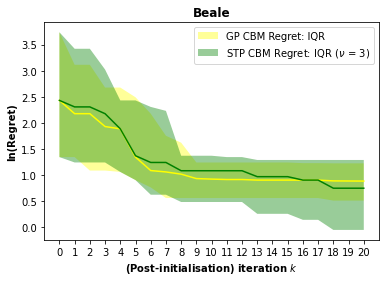

In [92]:
### Visualise!

title = obj_func

plt.figure()

plt.plot(median_gp, color = 'Yellow')
plt.plot(median_stp, color = 'Green')

xstar = np.arange(0, max_iter+1, step=1)
plt.fill_between(xstar, lower_gp, upper_gp, facecolor = 'Yellow', alpha=0.4, label='GP CBM Regret: IQR')
plt.fill_between(xstar, lower_stp, upper_stp, facecolor = 'Green', alpha=0.4, label='STP CBM Regret: IQR ' r'($\nu$' ' = {})'.format(df))

plt.title(title, weight = 'bold')
plt.xlabel('(Post-initialisation) iteration $\it{k}$', weight = 'bold') # x-axis label
plt.ylabel('ln(Regret)', weight = 'bold') # y-axis label
plt.legend(loc=0) # add plot legend

### Make the x-ticks integers, not floats:
count = len(xstar)
plt.xticks(np.arange(count), np.arange(0, count))
plt.show() #visualise!
